Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Triple-Ten, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

# Descripcion

Prepara un prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada.
El modelo debe predecir la cantidad de oro extraído del mineral de oro. Dispones de los datos de extracción y purificación.
El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.
La siguiente lección trata sobre el proceso de depuración del mineral. Te tocará seleccionar la información importante para el desarrollo del modelo. 

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El proyecto estara enfocado en encontrar el modelo de prediccion que mejor se ajuste a los requerimientos de `Zyfra` para depurar el proceso de purificacion del mineral de oro y asi mejorar el rendimiento de la extraccion del mineral.
</div>

# Inicializacion

In [30]:
# Cargar todas las librerías

import pandas as pd
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento de los Datos

## Carga de los Datos

In [2]:
# Carga el archivo de datos en un DataFrame

df_training = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test  = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

## Exploracion de los Datos

In [3]:
# Acceder a la columna 'rougher.output.recovery' del conjunto de entrenamiento para obtener los valores de recuperación

df_training['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

In [4]:
# imprime la información general/resumida sobre el DataFrame

df_training.head()

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   
3                                 -500.857308   
4                                 -499.838632   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   
2                                 11.912783   
3                                 11.999550   
4                                 11.953070   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   
2                                 -501.133383   
3                                 -501.193686   
4                                 -501.053894   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   
2                                 10.070913   
3                                  9.970366   
4                                  9.925709   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   
2                                 -500.129135   
3                                 -499.201640   
4                                 -501.686727   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   
2                                  8.013877   
3                                  7.977324   
4                                  7.894242   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   
2                                 -500.517572   
3                                 -500.255908   
4                                 -500.356035   

   secondary_cleaner.state.floatbank6_a_air  \
0    

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca hemos cargado las librerias necesarias para el proyecto, cargamos el dataframe que usaremos y definimos el tipo de informacion que contiene el dataframe a ser usado.
</div>

In [5]:
# Obtener información sobre los datos

print(df_training.info())
print(df_test.info())
print(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Cuando usas `print()` para DataFrames en Jupyter Notebooks, pierdes los beneficios del formato HTML integrado. `display()` o simplemente dejar el DataFrame en una celda muestra los datos con un estilo más claro y ordenado, aprovechando las capacidades HTML de Jupyter. Esto facilita la interpretación y análisis de los datos, especialmente para tablas grandes o complejas.
</div>

## Corregir los Datos

In [6]:
# Llenar los valores faltantes en los conjuntos de entrenamiento y prueba, utilizando el método de propagación hacia adelante (forward fill)

df_training = df_training.fillna(method = 'ffill')
df_test = df_test.fillna(method = 'ffill')


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Correcto. buen trabajo al remplazar los datos faltantes. en proyectos futuros recuerda que tenemos têcnicas der imputacón de datos más avanzadas. </div>

In [7]:
# columnas faltantes en el conjunto de prueba en comparación con el conjunto de entrenamiento

missed_test_columns = set(list(df_training.columns.values))-set(list(df_test.columns.values))
missed_test_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [8]:
# Identificar columnas faltantes en df_test
missed_columns = set(df_full.columns) - set(df_test.columns)

# Llenar las columnas faltantes en df_test con los datos correspondientes de df_full
for column in missed_columns:
    if column != 'date':  # Excluir la columna 'date'
        df_test[column] = df_full[column]

# Verificar que todas las columnas se han agregado correctamente
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                5856 non-null   object 
 1   primary_cleaner.input.sulfate                       5856 non-null   float64
 2   primary_cleaner.input.depressant                    5856 non-null   float64
 3   primary_cleaner.input.feed_size                     5856 non-null   float64
 4   primary_cleaner.input.xanthate                      5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air              5856 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level            5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air              5856 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level            5856 non-null   float64
 9


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Bue manejo de los sets
</div>

In [9]:
# Rellenar los valores faltantes con la mediana de cada columna
df_test_filled = df_test.fillna(df_test.median())

# Verificar que ya no hay valores faltantes
print(df_test_filled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                5856 non-null   object 
 1   primary_cleaner.input.sulfate                       5856 non-null   float64
 2   primary_cleaner.input.depressant                    5856 non-null   float64
 3   primary_cleaner.input.feed_size                     5856 non-null   float64
 4   primary_cleaner.input.xanthate                      5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air              5856 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level            5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air              5856 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level            5856 non-null   float64
 9

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En esta seccion nos dedicamos a corregirlos, abordamos los hallazgos con algunas soluciones convenientes para poder tener una data lo mas fiel y precisa posible, corregimos la disparidad en los valores de los `DF` usando el metodo de propagacion hacia delante `ffill`, como pudimos observar nos topamos con que el `df_test` tenia una falta de columnas algo grave, que nos impediria hacer la investigacion, lo que decidimos hacer fue ir a la fuente, digase el df_full, copiar las columnas necesarias para tener identicos los `DF` y trabajar de ahi en adelante en eliminar valores faltantes y demas, luego que teniamos el `df_test` con las columnas deseadas, procedimos a rellenar los valores faltantes con la mediana, ya que teniendo valores ausentes no ibamos a poder usar de manera satisfactoria este `DF`, al rellenar con la mediana evitamos tener un impacto demasiado significativo en el resultado de la investigacion.
</div>

## Enriquecer los Datos

In [10]:
# Convertir la columna 'date' a tipo datetime en los tres DataFrames
df_training['date'] = pd.to_datetime(df_training['date'])
df_test_filled['date'] = pd.to_datetime(df_test_filled['date'])
df_full['date'] = pd.to_datetime(df_full['date'])

# Verificar el cambio de tipo de datos
print(df_training.info())
print(df_test_filled.info())
print(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16860 non-null  float64       
 2   final.output.concentrate_pb                         16860 non-null  float64       
 3   final.output.concentrate_sol                        16860 non-null  float64       
 4   final.output.concentrate_au                         16860 non-null  float64       
 5   final.output.recovery                               16860 non-null  float64       
 6   final.output.tail_ag                                16860 non-null  float64       
 7   final.output.tail_pb                                16860 non-null  float64       
 8   final.

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En esta pequeña seccion del preprocesamiento de los datos nos dedicamos a simplemente cambiar el tipo de variable de la columna date para un tipo de dato mas util en caso de que se deba utilizar mas adelante, por eso volvimos esta variable a tipo `datetime`, asi en caso de ser necesario podremos utilizarla en la investigacion.
</div>

# Analizar los Datos

In [12]:
# vamos a evaluar la data que tenemos usando el metodo `describe`

print(df_training.describe())
print(df_test_filled.describe())

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 16860.000000                 16860.000000   
mean                      4.699066                     9.080638   
std                       2.111997                     3.428085   
min                       0.000000                     0.000000   
25%                       3.958988                     8.803975   
50%                       4.860663                    10.059206   
75%                       5.816487                    11.052001   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  16860.000000                 16860.000000   
mean                       8.166207                    39.321631   
std                        3.907771                    14.095421   
min                        0.000000                     0.000000   
25%                        6.822682                    4

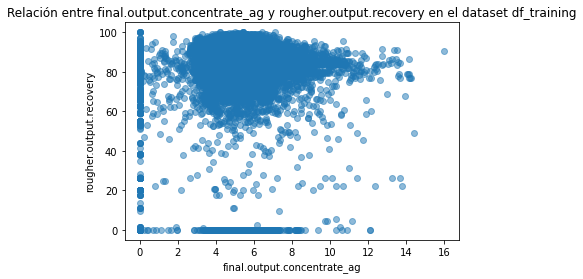


Correlación de Pearson para 'final.output.concentrate_ag' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


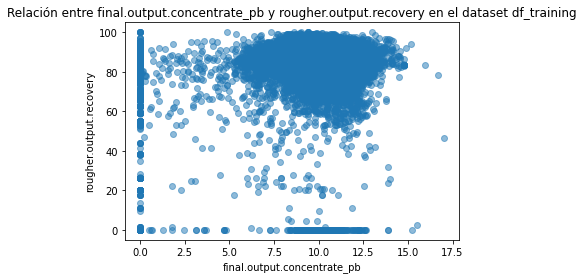


Correlación de Pearson para 'final.output.concentrate_pb' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


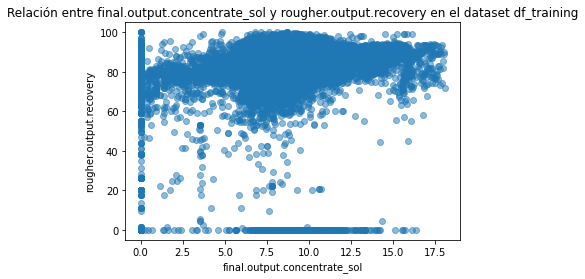


Correlación de Pearson para 'final.output.concentrate_sol' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


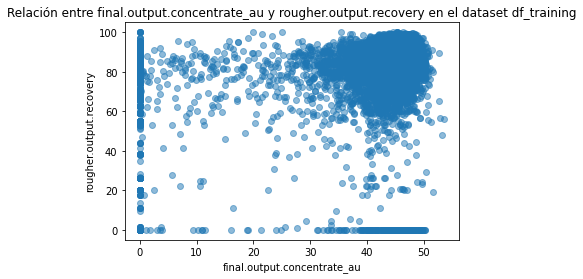


Correlación de Pearson para 'final.output.concentrate_au' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


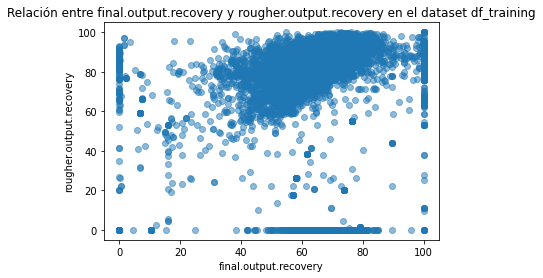


Correlación de Pearson para 'final.output.recovery' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


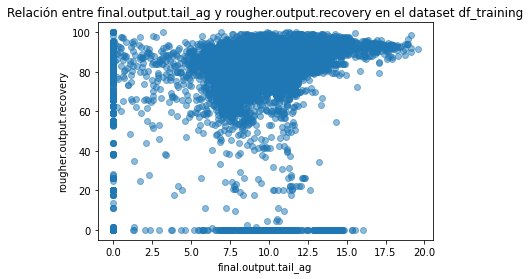


Correlación de Pearson para 'final.output.tail_ag' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


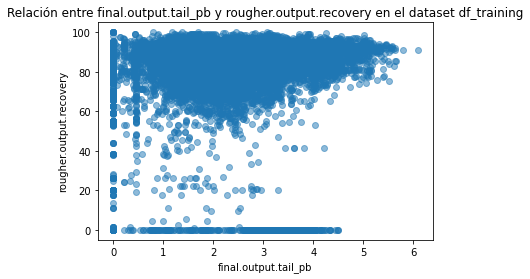


Correlación de Pearson para 'final.output.tail_pb' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


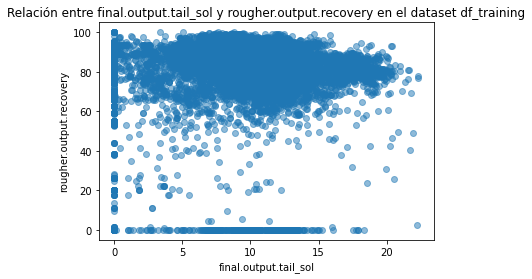


Correlación de Pearson para 'final.output.tail_sol' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


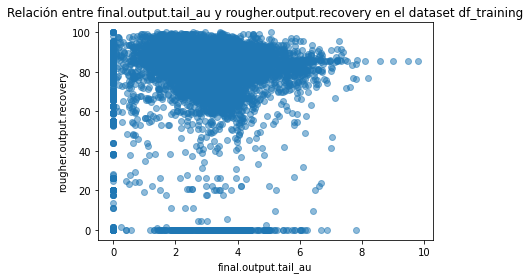


Correlación de Pearson para 'final.output.tail_au' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


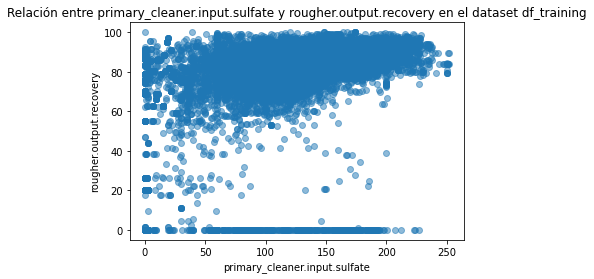


Correlación de Pearson para 'primary_cleaner.input.sulfate' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


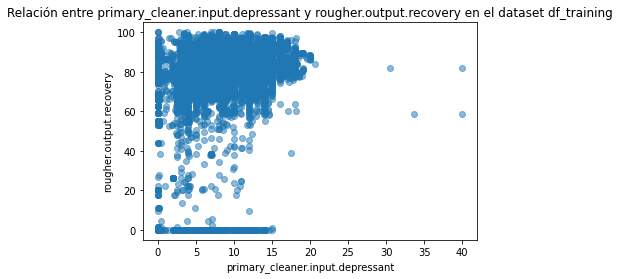


Correlación de Pearson para 'primary_cleaner.input.depressant' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


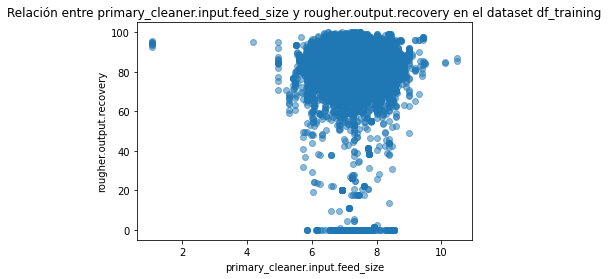


Correlación de Pearson para 'primary_cleaner.input.feed_size' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


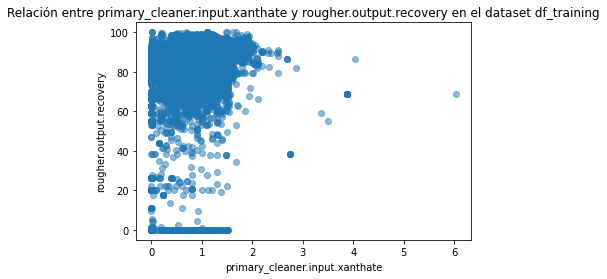


Correlación de Pearson para 'primary_cleaner.input.xanthate' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


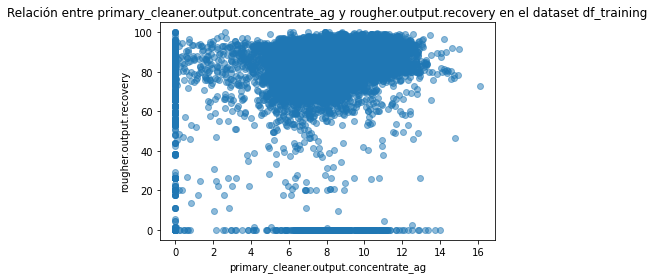


Correlación de Pearson para 'primary_cleaner.output.concentrate_ag' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


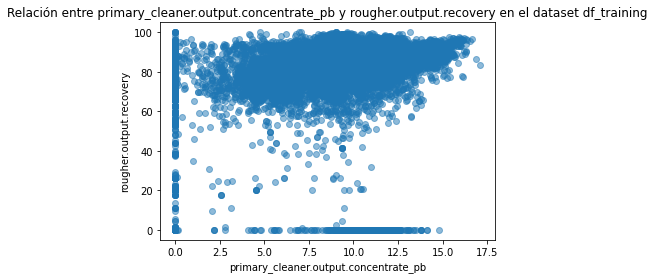


Correlación de Pearson para 'primary_cleaner.output.concentrate_pb' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


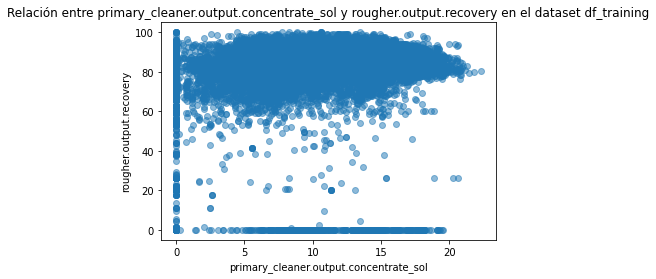


Correlación de Pearson para 'primary_cleaner.output.concentrate_sol' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


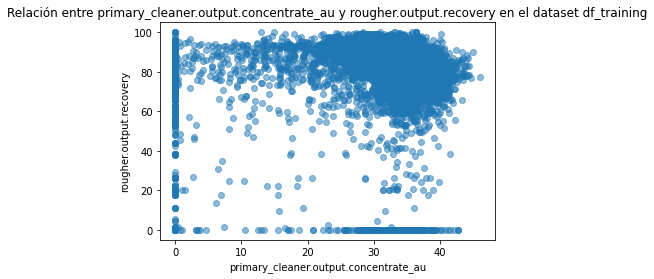


Correlación de Pearson para 'primary_cleaner.output.concentrate_au' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


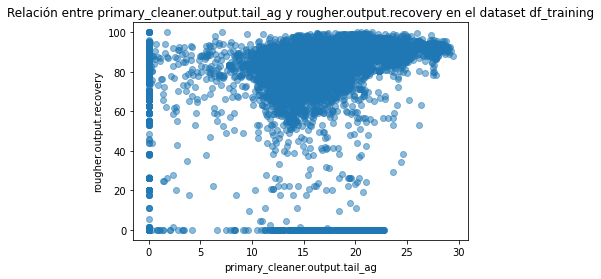


Correlación de Pearson para 'primary_cleaner.output.tail_ag' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


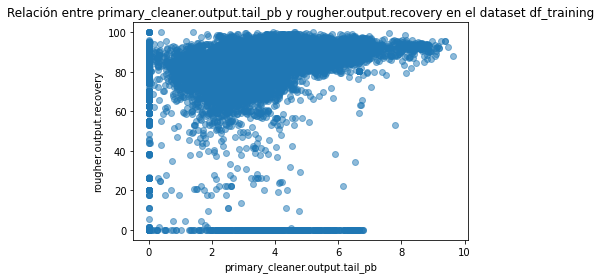


Correlación de Pearson para 'primary_cleaner.output.tail_pb' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


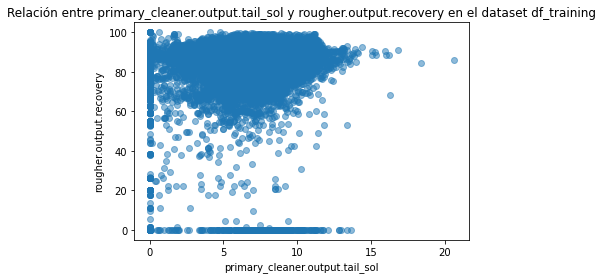


Correlación de Pearson para 'primary_cleaner.output.tail_sol' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


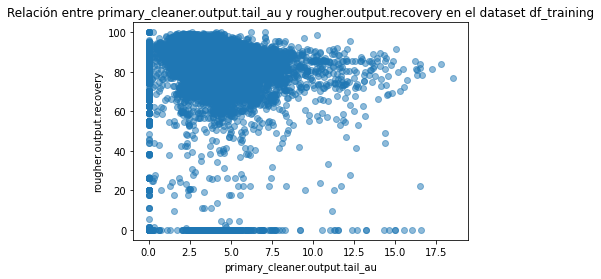


Correlación de Pearson para 'primary_cleaner.output.tail_au' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


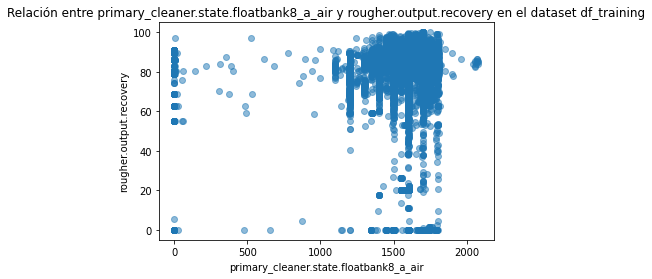


Correlación de Pearson para 'primary_cleaner.state.floatbank8_a_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


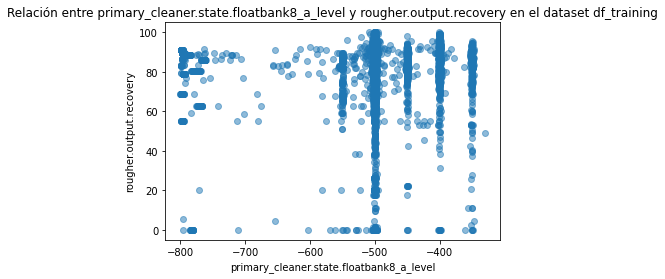


Correlación de Pearson para 'primary_cleaner.state.floatbank8_a_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


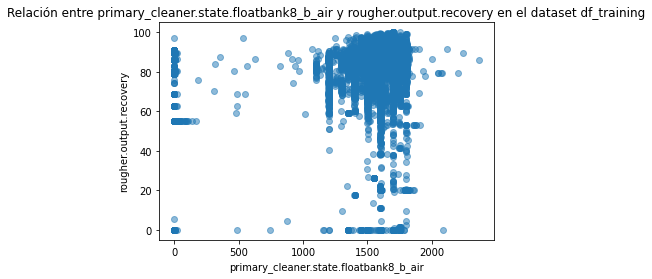


Correlación de Pearson para 'primary_cleaner.state.floatbank8_b_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


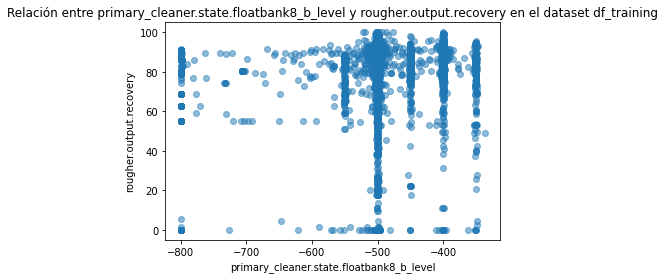


Correlación de Pearson para 'primary_cleaner.state.floatbank8_b_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


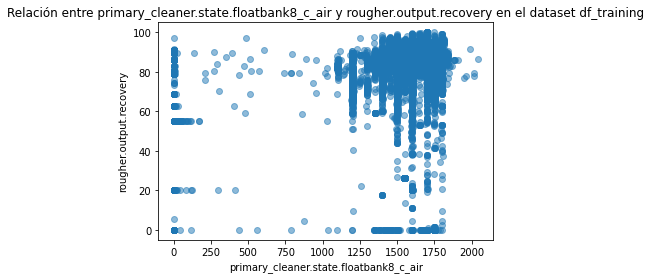


Correlación de Pearson para 'primary_cleaner.state.floatbank8_c_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


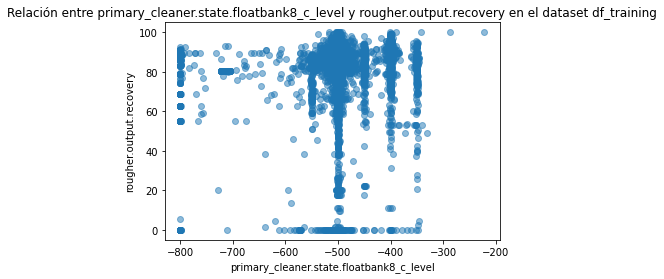


Correlación de Pearson para 'primary_cleaner.state.floatbank8_c_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


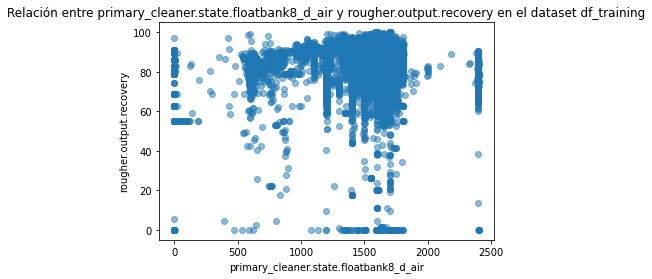


Correlación de Pearson para 'primary_cleaner.state.floatbank8_d_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


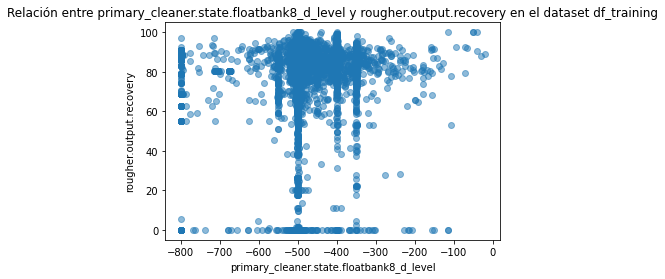


Correlación de Pearson para 'primary_cleaner.state.floatbank8_d_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


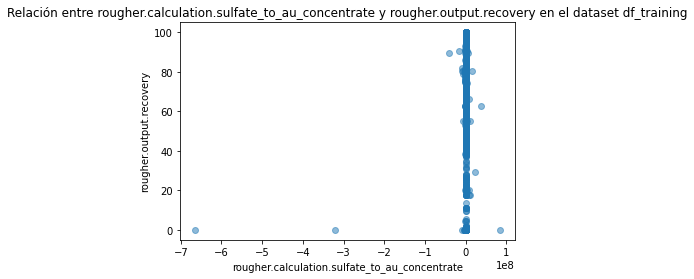


Correlación de Pearson para 'rougher.calculation.sulfate_to_au_concentrate' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


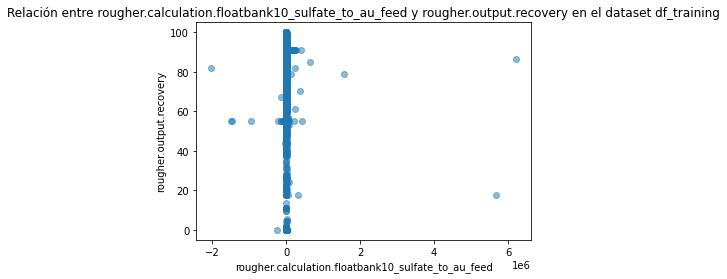


Correlación de Pearson para 'rougher.calculation.floatbank10_sulfate_to_au_feed' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


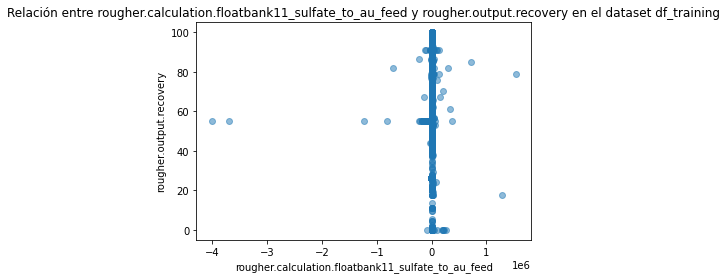


Correlación de Pearson para 'rougher.calculation.floatbank11_sulfate_to_au_feed' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


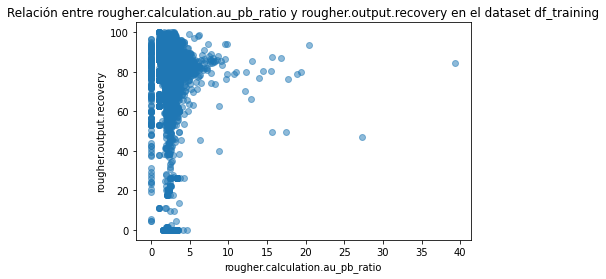


Correlación de Pearson para 'rougher.calculation.au_pb_ratio' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


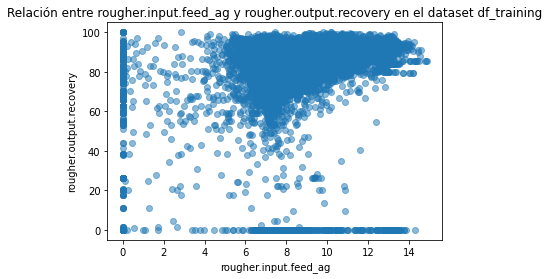


Correlación de Pearson para 'rougher.input.feed_ag' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


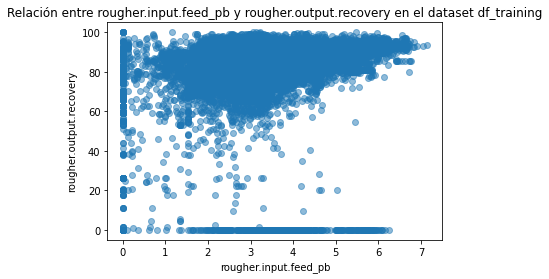


Correlación de Pearson para 'rougher.input.feed_pb' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


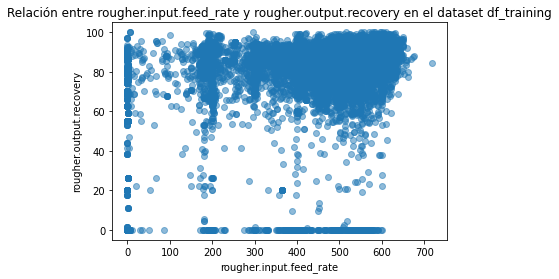


Correlación de Pearson para 'rougher.input.feed_rate' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


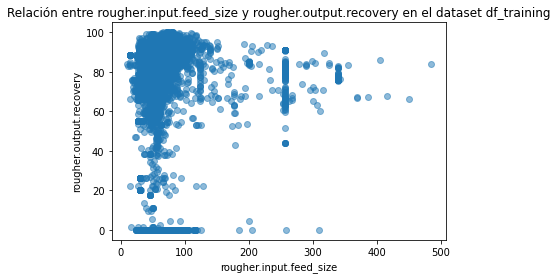


Correlación de Pearson para 'rougher.input.feed_size' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


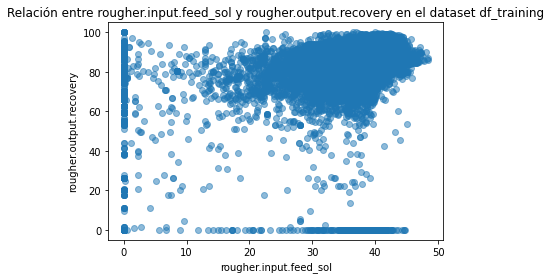


Correlación de Pearson para 'rougher.input.feed_sol' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


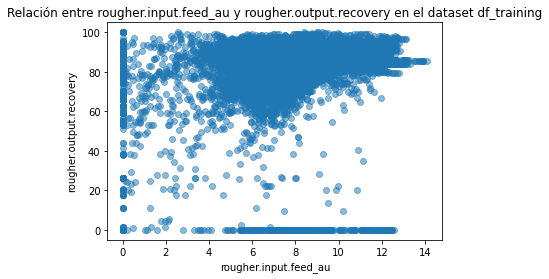


Correlación de Pearson para 'rougher.input.feed_au' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


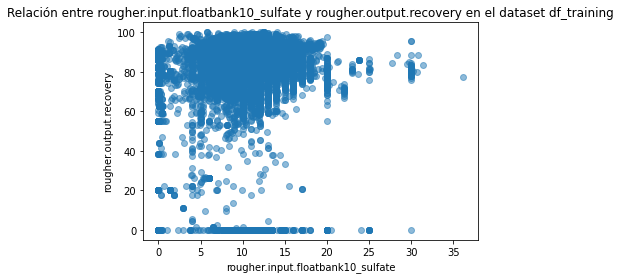


Correlación de Pearson para 'rougher.input.floatbank10_sulfate' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


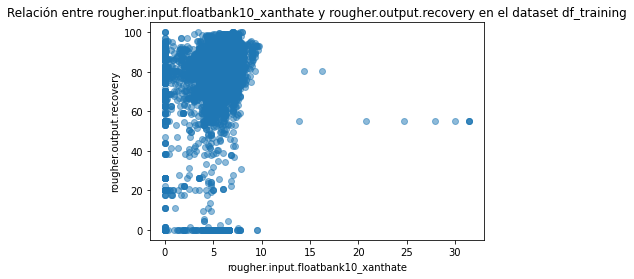


Correlación de Pearson para 'rougher.input.floatbank10_xanthate' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


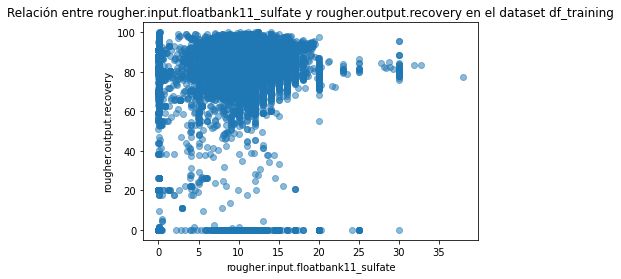


Correlación de Pearson para 'rougher.input.floatbank11_sulfate' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


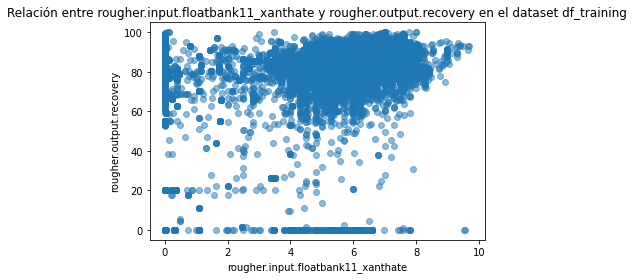


Correlación de Pearson para 'rougher.input.floatbank11_xanthate' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


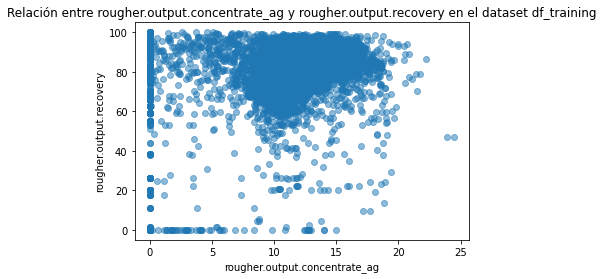


Correlación de Pearson para 'rougher.output.concentrate_ag' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


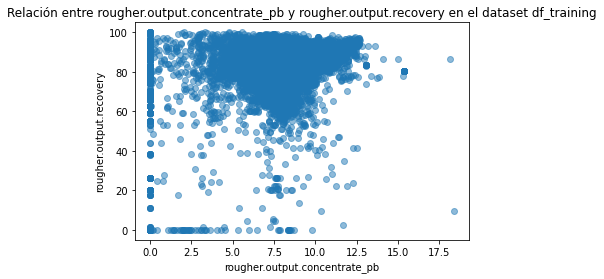


Correlación de Pearson para 'rougher.output.concentrate_pb' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


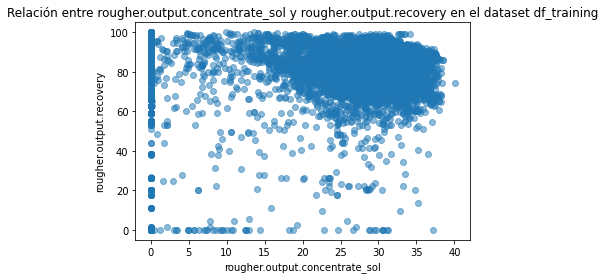


Correlación de Pearson para 'rougher.output.concentrate_sol' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


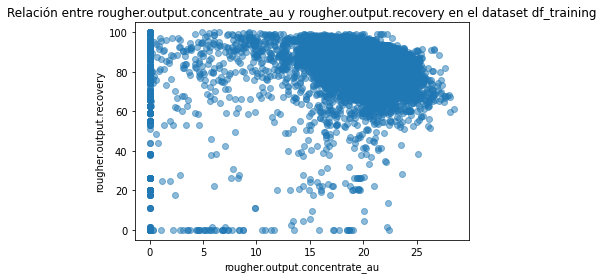


Correlación de Pearson para 'rougher.output.concentrate_au' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


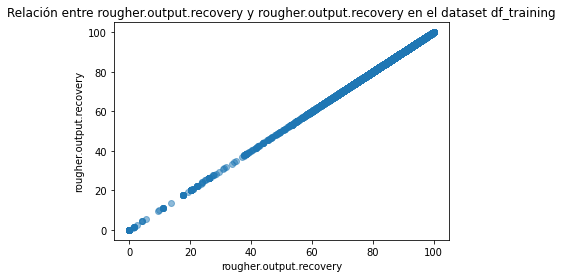


Correlación de Pearson para 'rougher.output.recovery' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


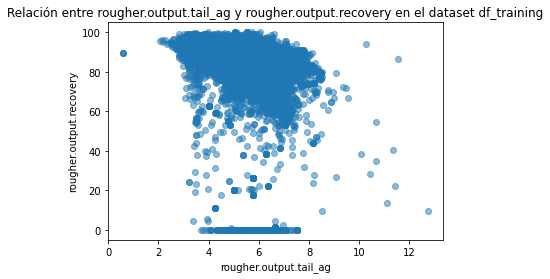


Correlación de Pearson para 'rougher.output.tail_ag' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


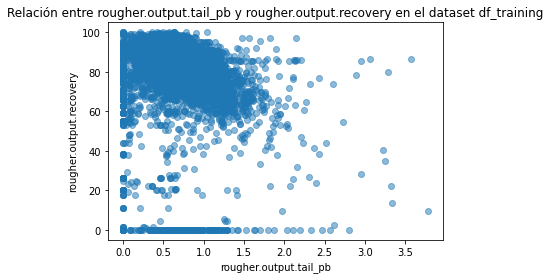


Correlación de Pearson para 'rougher.output.tail_pb' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


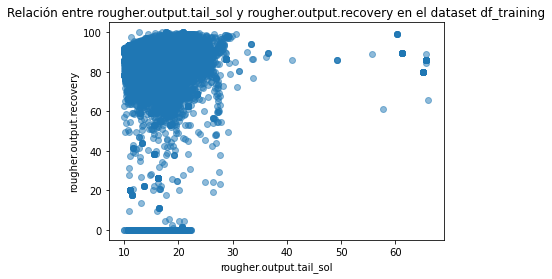


Correlación de Pearson para 'rougher.output.tail_sol' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


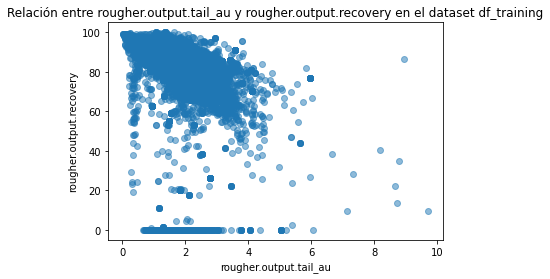


Correlación de Pearson para 'rougher.output.tail_au' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


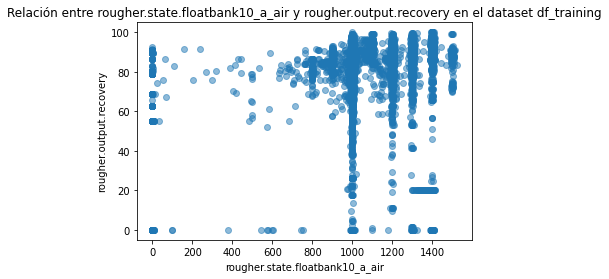


Correlación de Pearson para 'rougher.state.floatbank10_a_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


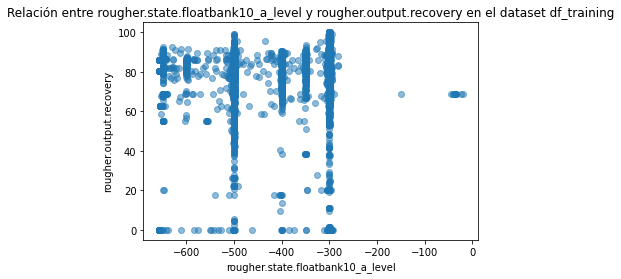


Correlación de Pearson para 'rougher.state.floatbank10_a_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


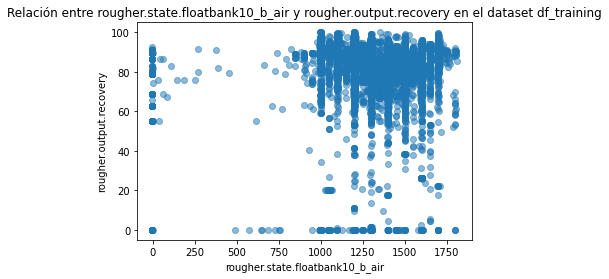


Correlación de Pearson para 'rougher.state.floatbank10_b_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


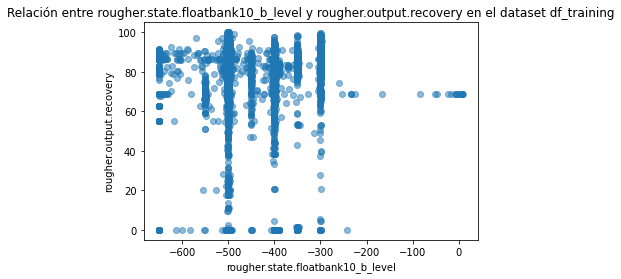


Correlación de Pearson para 'rougher.state.floatbank10_b_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


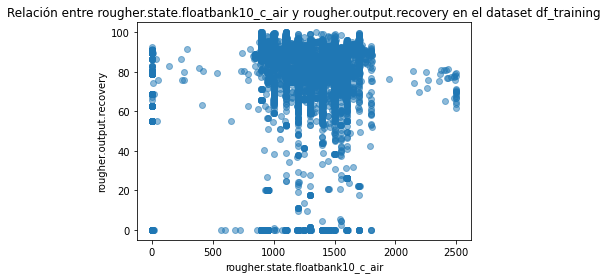


Correlación de Pearson para 'rougher.state.floatbank10_c_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


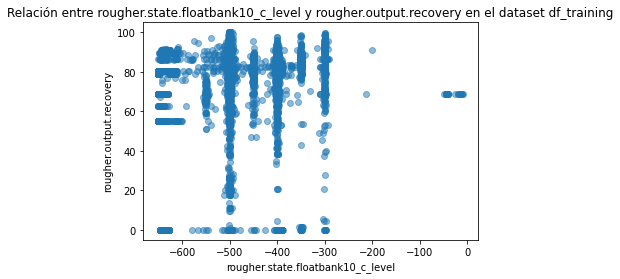


Correlación de Pearson para 'rougher.state.floatbank10_c_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


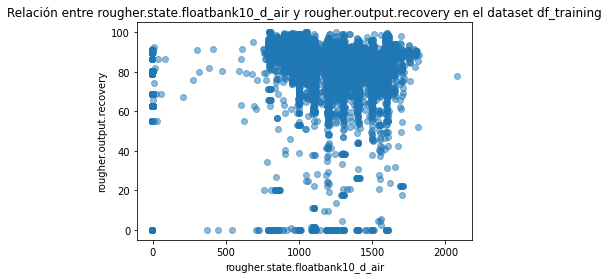


Correlación de Pearson para 'rougher.state.floatbank10_d_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


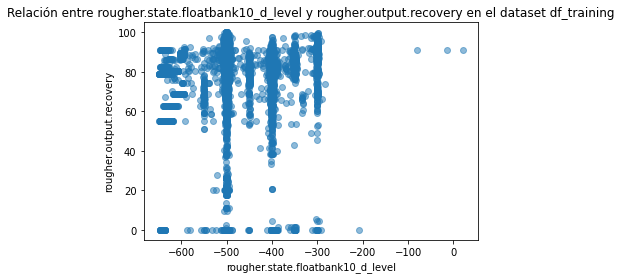


Correlación de Pearson para 'rougher.state.floatbank10_d_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


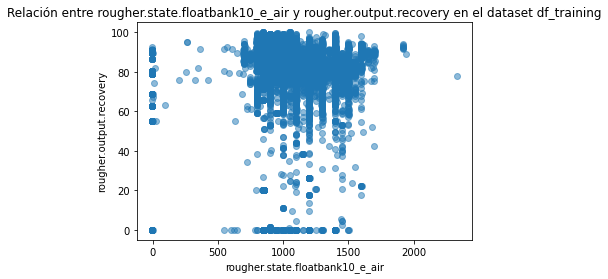


Correlación de Pearson para 'rougher.state.floatbank10_e_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


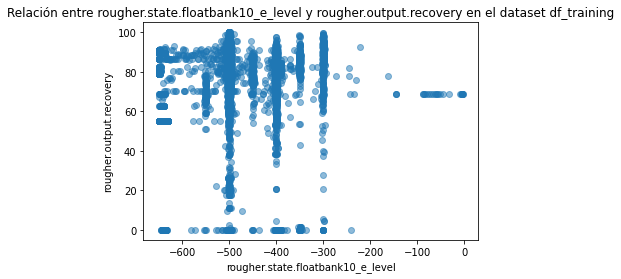


Correlación de Pearson para 'rougher.state.floatbank10_e_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


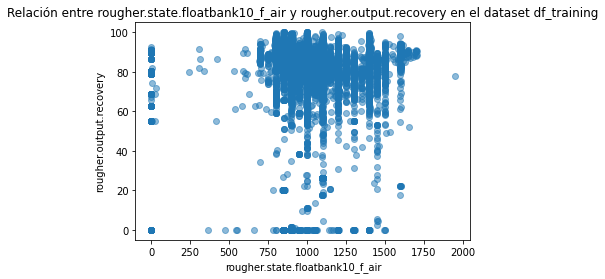


Correlación de Pearson para 'rougher.state.floatbank10_f_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


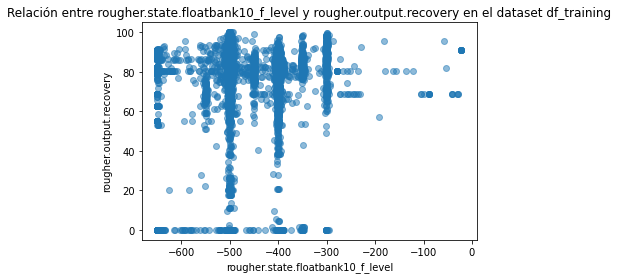


Correlación de Pearson para 'rougher.state.floatbank10_f_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


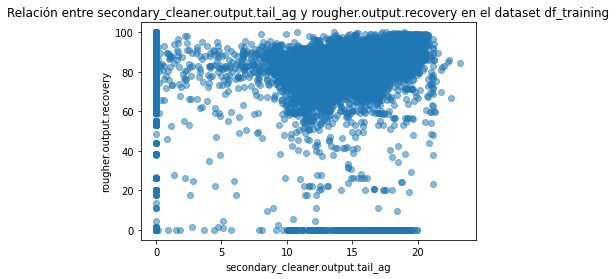


Correlación de Pearson para 'secondary_cleaner.output.tail_ag' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


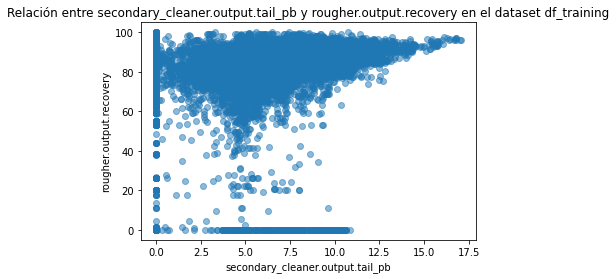


Correlación de Pearson para 'secondary_cleaner.output.tail_pb' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


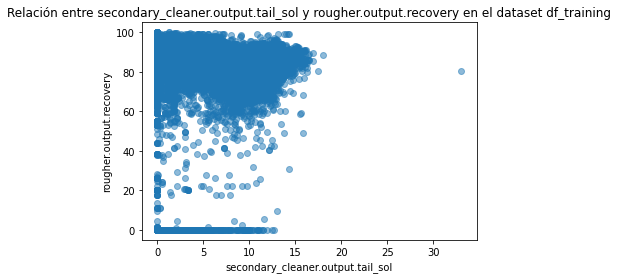


Correlación de Pearson para 'secondary_cleaner.output.tail_sol' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


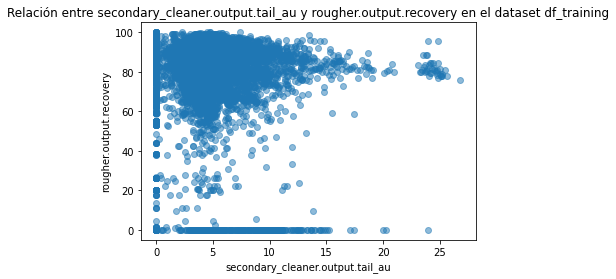


Correlación de Pearson para 'secondary_cleaner.output.tail_au' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


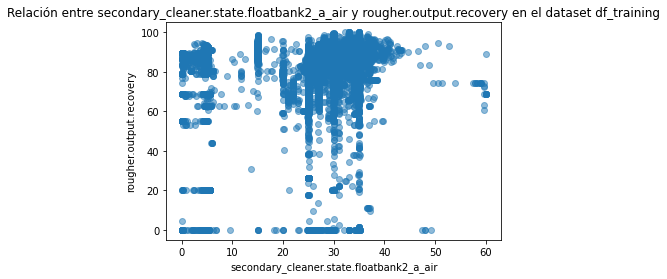


Correlación de Pearson para 'secondary_cleaner.state.floatbank2_a_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


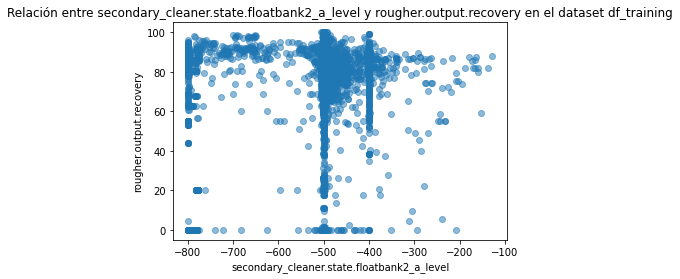


Correlación de Pearson para 'secondary_cleaner.state.floatbank2_a_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


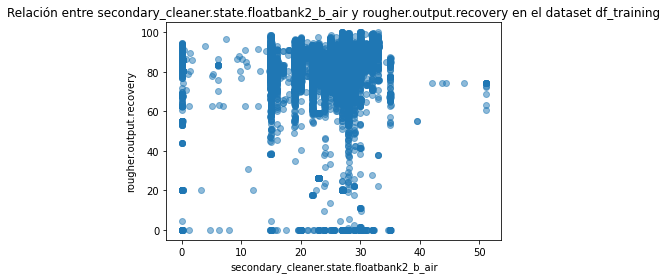


Correlación de Pearson para 'secondary_cleaner.state.floatbank2_b_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


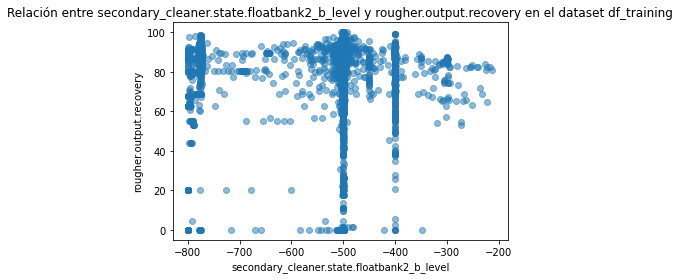


Correlación de Pearson para 'secondary_cleaner.state.floatbank2_b_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


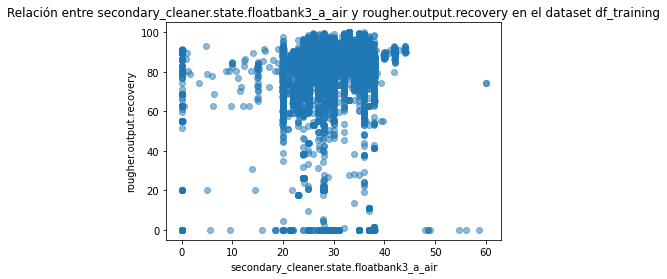


Correlación de Pearson para 'secondary_cleaner.state.floatbank3_a_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


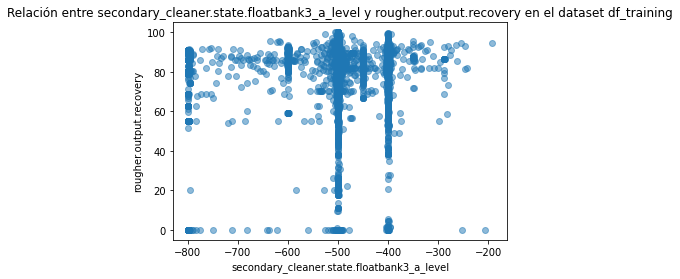


Correlación de Pearson para 'secondary_cleaner.state.floatbank3_a_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


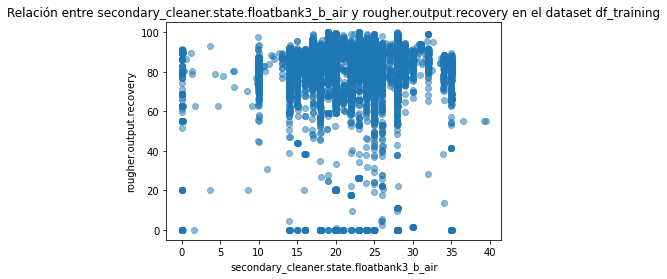


Correlación de Pearson para 'secondary_cleaner.state.floatbank3_b_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


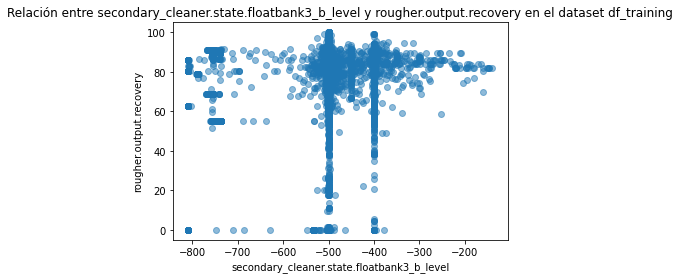


Correlación de Pearson para 'secondary_cleaner.state.floatbank3_b_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


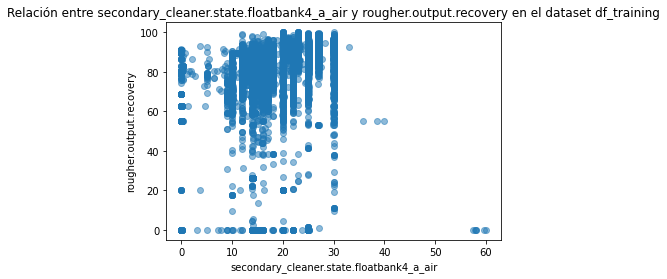


Correlación de Pearson para 'secondary_cleaner.state.floatbank4_a_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


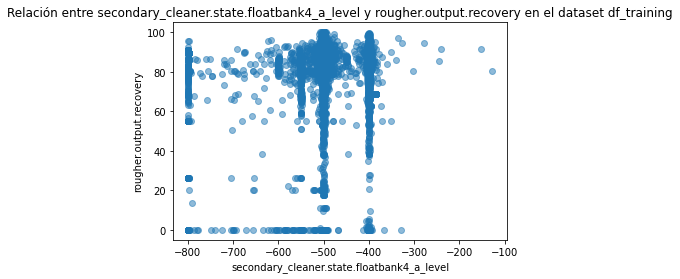


Correlación de Pearson para 'secondary_cleaner.state.floatbank4_a_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


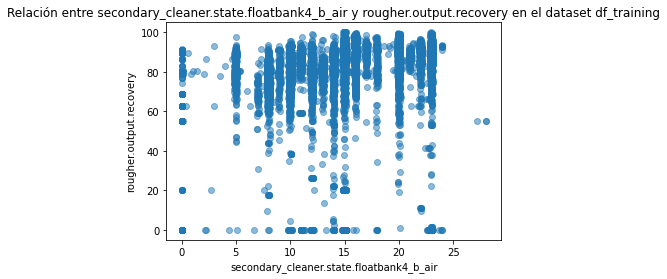


Correlación de Pearson para 'secondary_cleaner.state.floatbank4_b_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


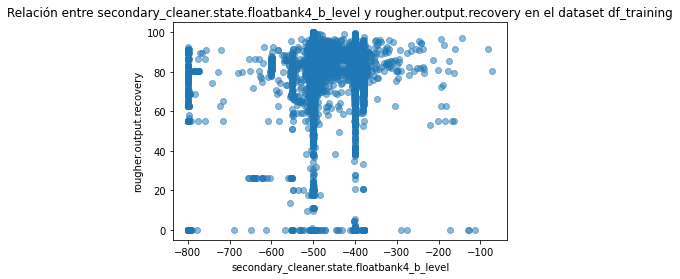


Correlación de Pearson para 'secondary_cleaner.state.floatbank4_b_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


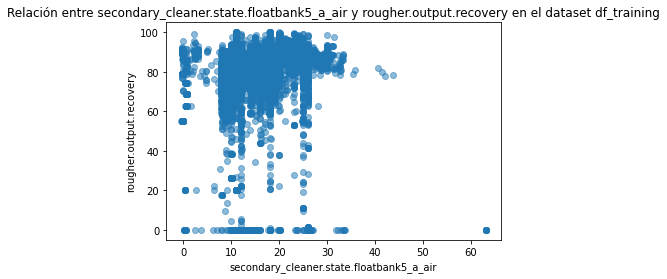


Correlación de Pearson para 'secondary_cleaner.state.floatbank5_a_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


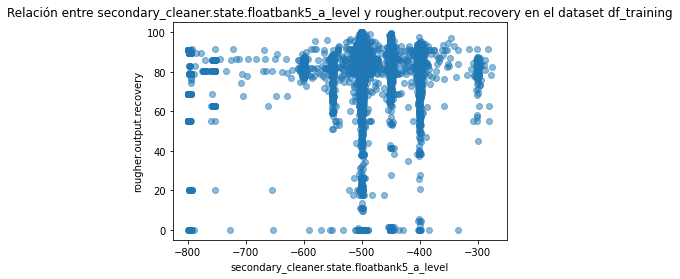


Correlación de Pearson para 'secondary_cleaner.state.floatbank5_a_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


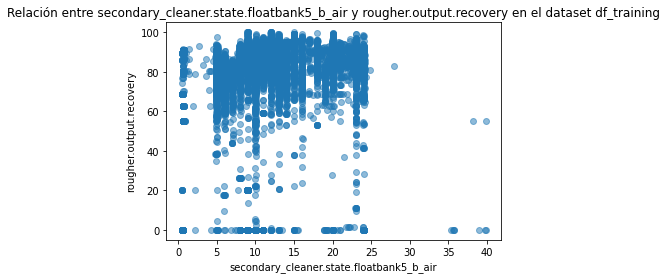


Correlación de Pearson para 'secondary_cleaner.state.floatbank5_b_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


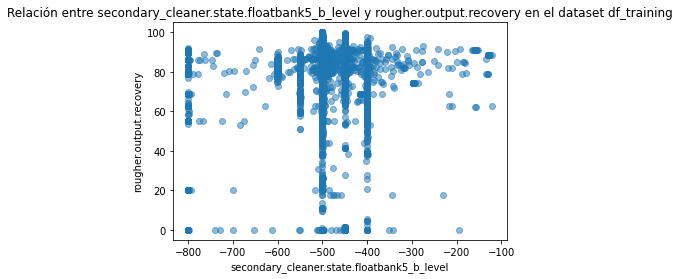


Correlación de Pearson para 'secondary_cleaner.state.floatbank5_b_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


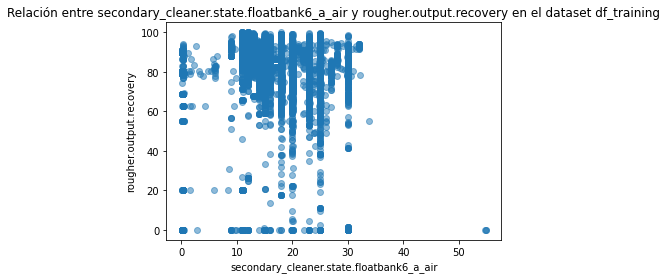


Correlación de Pearson para 'secondary_cleaner.state.floatbank6_a_air' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


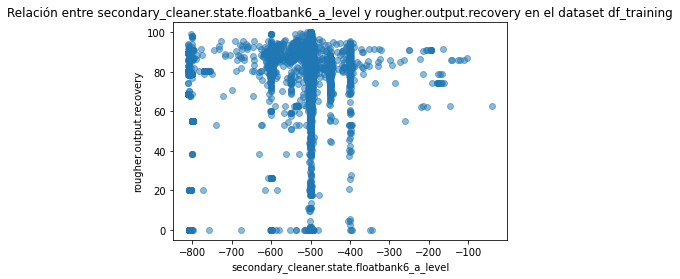


Correlación de Pearson para 'secondary_cleaner.state.floatbank6_a_level' en df_training:
rougher.output.recovery                               1.000000
rougher.output.concentrate_ag                         0.521058
rougher.output.concentrate_sol                        0.487110
rougher.output.concentrate_pb                         0.478281
rougher.output.concentrate_au                         0.473145
                                                        ...   
rougher.calculation.floatbank10_sulfate_to_au_feed   -0.008202
primary_cleaner.input.feed_size                      -0.019063
rougher.output.tail_pb                               -0.034031
rougher.output.tail_ag                               -0.148922
rougher.output.tail_au                               -0.303468
Name: rougher.output.recovery, Length: 86, dtype: float64


In [13]:
# Definir la función para visualizar la relación y calcular la correlación
def visualize_relationship(feature, target, data, dataset_name):
    plt.scatter(data[feature], data[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'Relación entre {feature} y {target} en el dataset {dataset_name}')
    plt.show()

def calculate_pearson_correlation(data, target):
    correlation = data.corr()[target].sort_values(ascending=False)
    return correlation

# Crear el gráfico y calcular la correlación para df_training
for feature in df_training.columns[1:]:  # Empezamos desde 1 para omitir la columna 'date'
    visualize_relationship(feature, 'rougher.output.recovery', df_training, "df_training")
    correlation = calculate_pearson_correlation(df_training, 'rougher.output.recovery')
    print(f"\nCorrelación de Pearson para '{feature}' en df_training:")
    print(correlation)

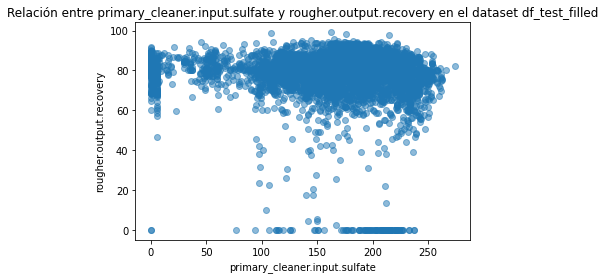


Correlación de Pearson para 'primary_cleaner.input.sulfate' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


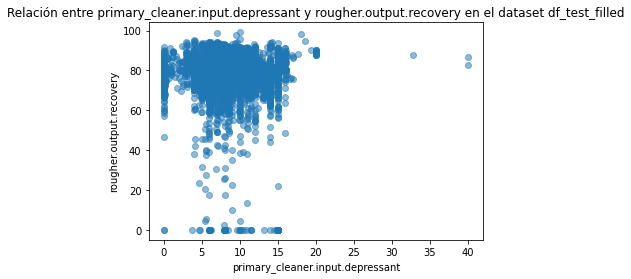


Correlación de Pearson para 'primary_cleaner.input.depressant' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


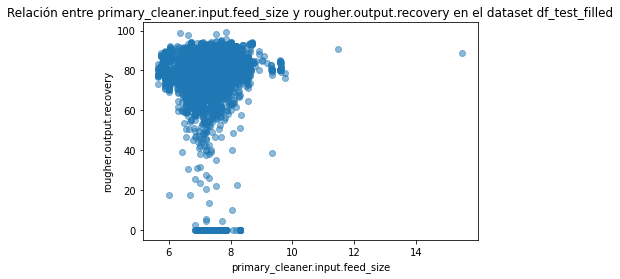


Correlación de Pearson para 'primary_cleaner.input.feed_size' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


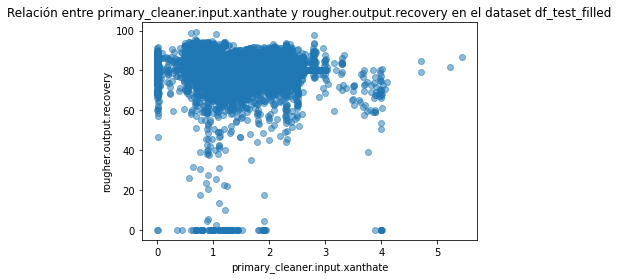


Correlación de Pearson para 'primary_cleaner.input.xanthate' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


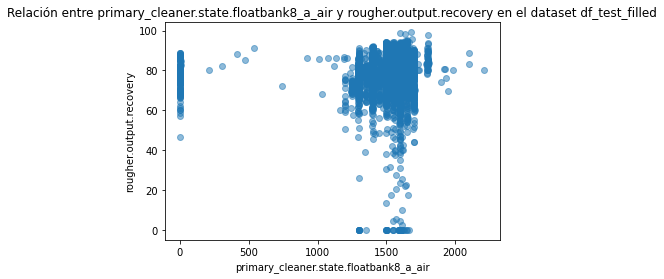


Correlación de Pearson para 'primary_cleaner.state.floatbank8_a_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


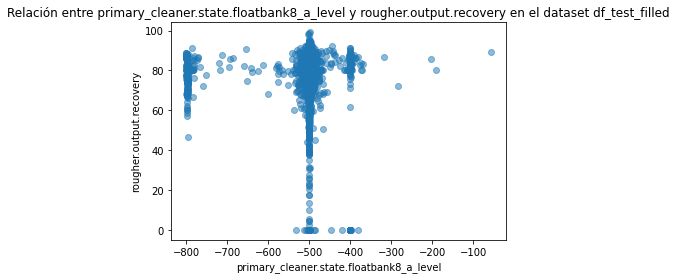


Correlación de Pearson para 'primary_cleaner.state.floatbank8_a_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


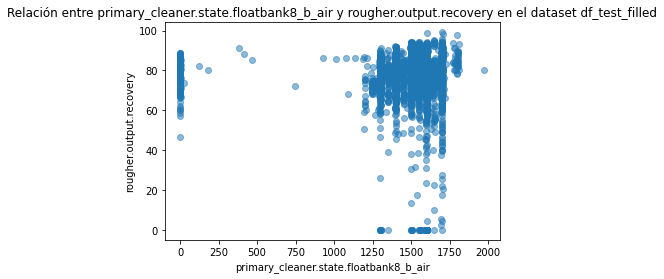


Correlación de Pearson para 'primary_cleaner.state.floatbank8_b_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


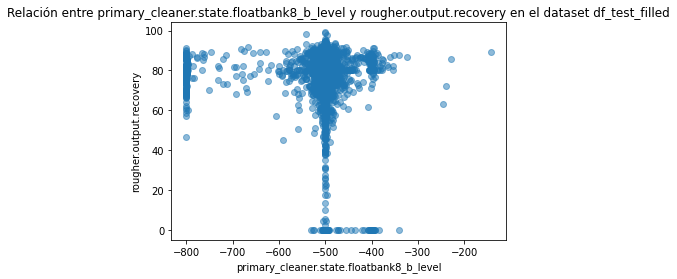


Correlación de Pearson para 'primary_cleaner.state.floatbank8_b_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


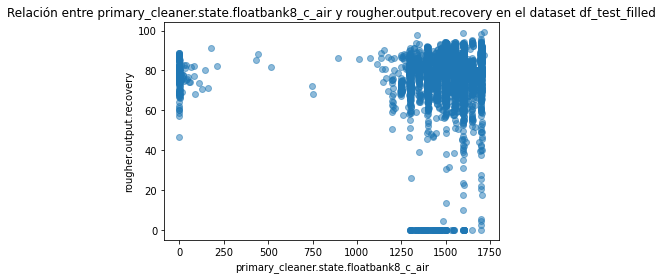


Correlación de Pearson para 'primary_cleaner.state.floatbank8_c_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


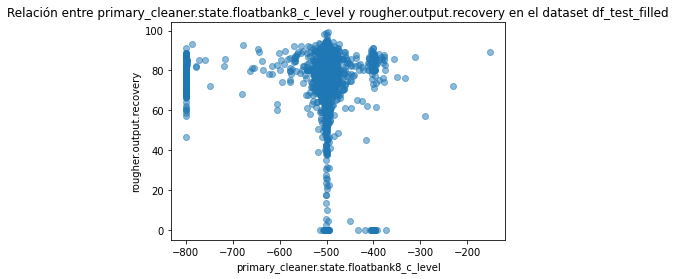


Correlación de Pearson para 'primary_cleaner.state.floatbank8_c_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


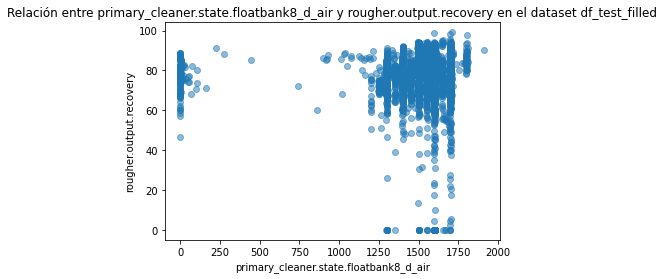


Correlación de Pearson para 'primary_cleaner.state.floatbank8_d_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


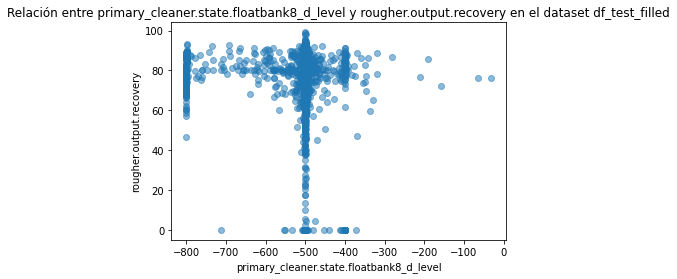


Correlación de Pearson para 'primary_cleaner.state.floatbank8_d_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


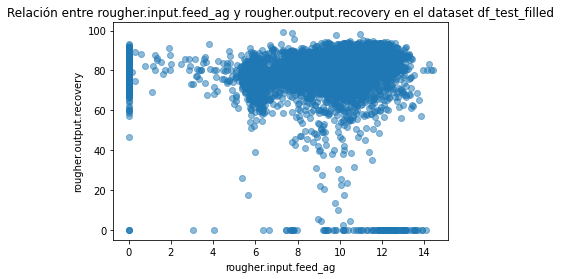


Correlación de Pearson para 'rougher.input.feed_ag' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


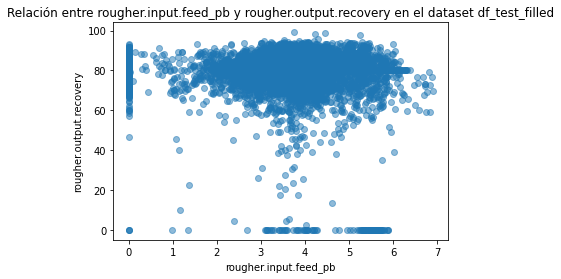


Correlación de Pearson para 'rougher.input.feed_pb' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


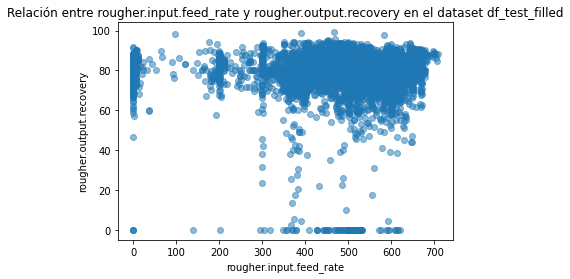


Correlación de Pearson para 'rougher.input.feed_rate' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


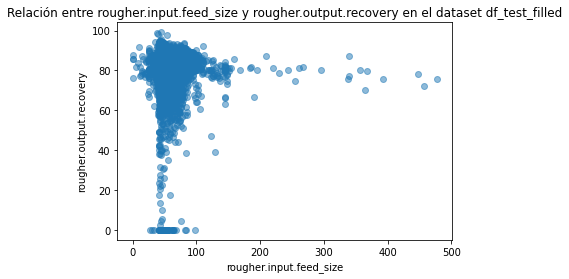


Correlación de Pearson para 'rougher.input.feed_size' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


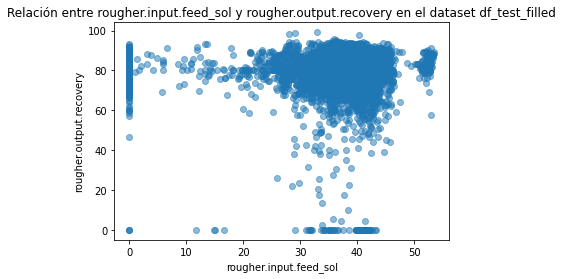


Correlación de Pearson para 'rougher.input.feed_sol' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


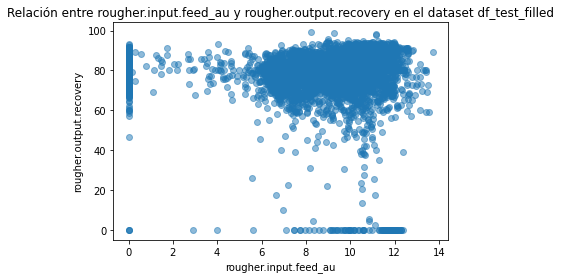


Correlación de Pearson para 'rougher.input.feed_au' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


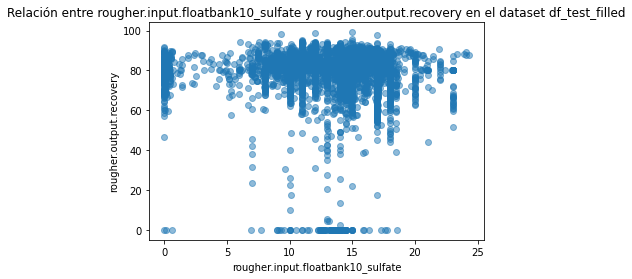


Correlación de Pearson para 'rougher.input.floatbank10_sulfate' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


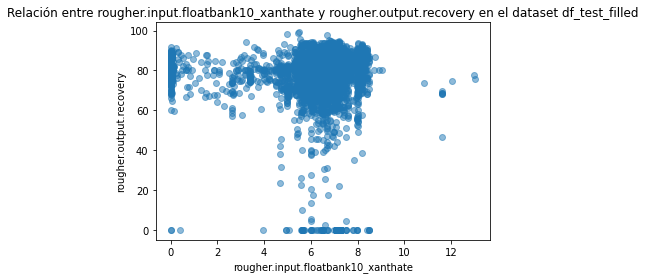


Correlación de Pearson para 'rougher.input.floatbank10_xanthate' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


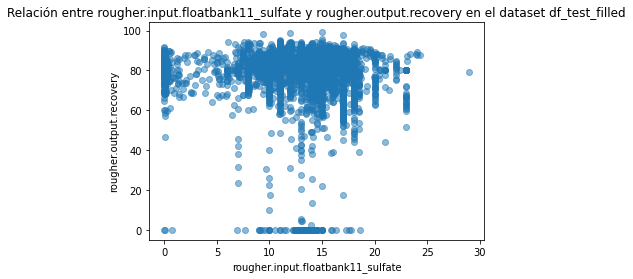


Correlación de Pearson para 'rougher.input.floatbank11_sulfate' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


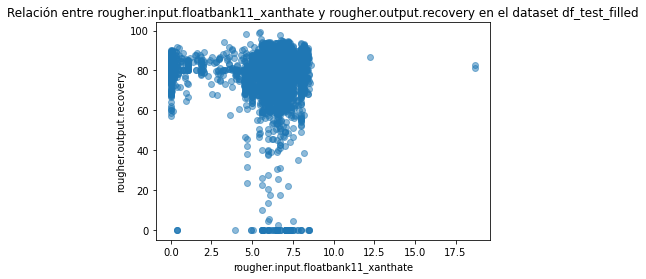


Correlación de Pearson para 'rougher.input.floatbank11_xanthate' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


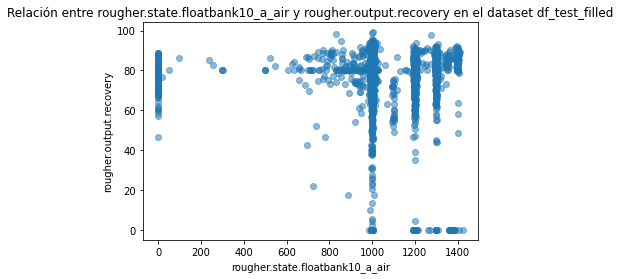


Correlación de Pearson para 'rougher.state.floatbank10_a_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


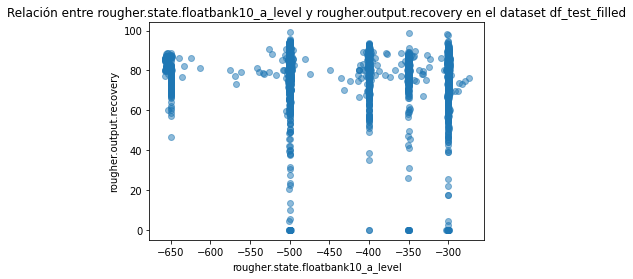


Correlación de Pearson para 'rougher.state.floatbank10_a_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


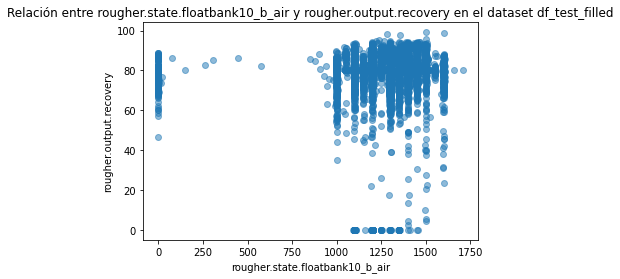


Correlación de Pearson para 'rougher.state.floatbank10_b_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


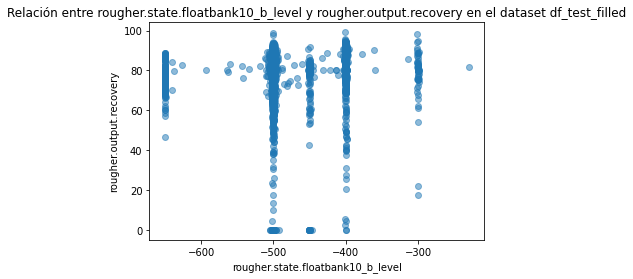


Correlación de Pearson para 'rougher.state.floatbank10_b_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


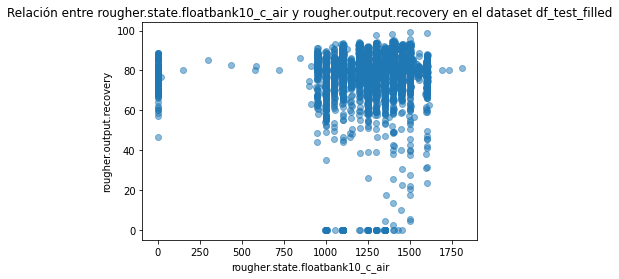


Correlación de Pearson para 'rougher.state.floatbank10_c_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


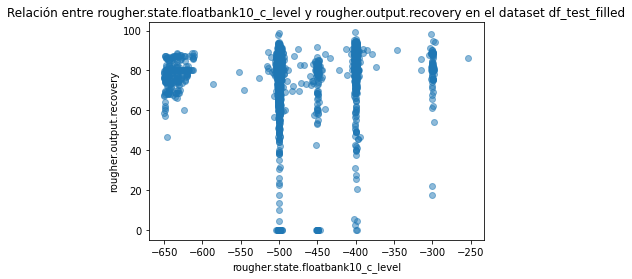


Correlación de Pearson para 'rougher.state.floatbank10_c_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


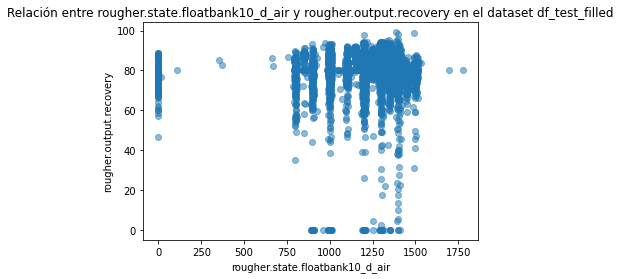


Correlación de Pearson para 'rougher.state.floatbank10_d_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


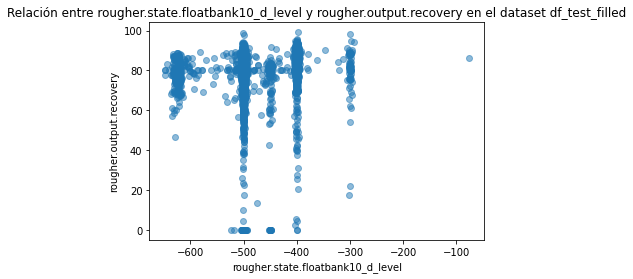


Correlación de Pearson para 'rougher.state.floatbank10_d_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


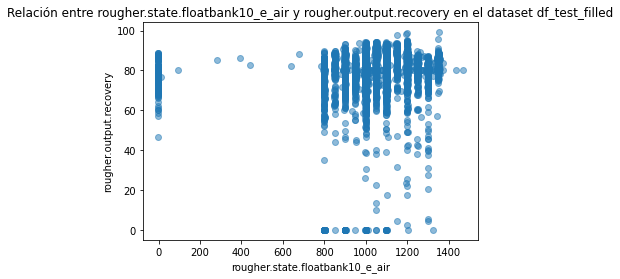


Correlación de Pearson para 'rougher.state.floatbank10_e_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


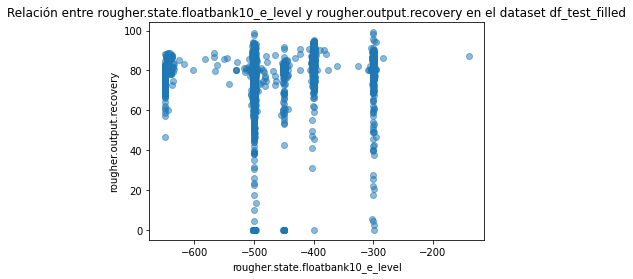


Correlación de Pearson para 'rougher.state.floatbank10_e_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


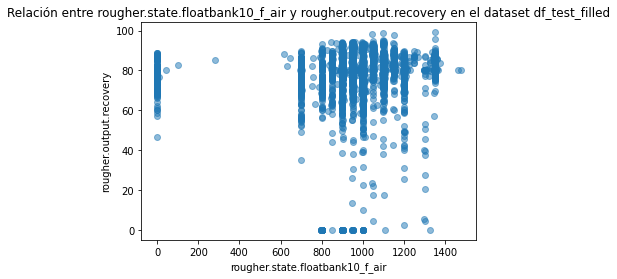


Correlación de Pearson para 'rougher.state.floatbank10_f_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


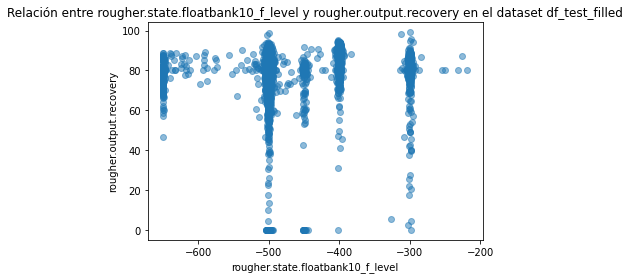


Correlación de Pearson para 'rougher.state.floatbank10_f_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


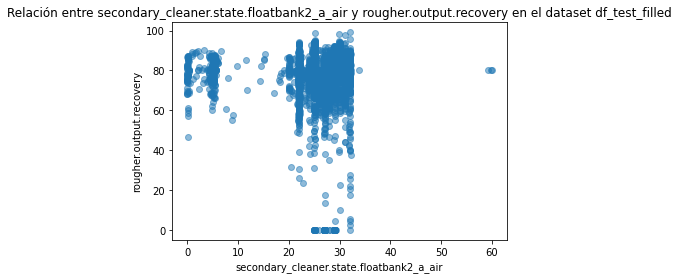


Correlación de Pearson para 'secondary_cleaner.state.floatbank2_a_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


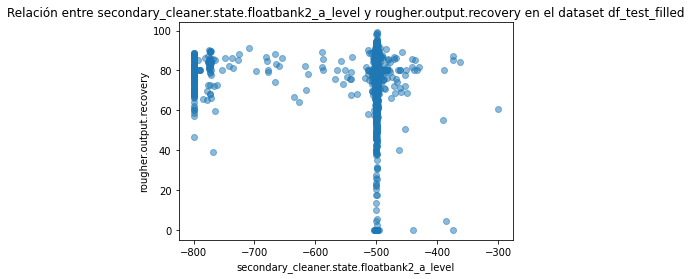


Correlación de Pearson para 'secondary_cleaner.state.floatbank2_a_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


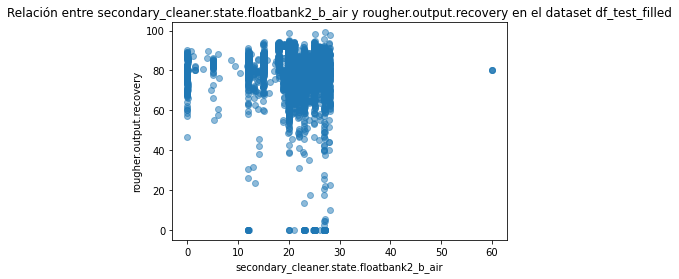


Correlación de Pearson para 'secondary_cleaner.state.floatbank2_b_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


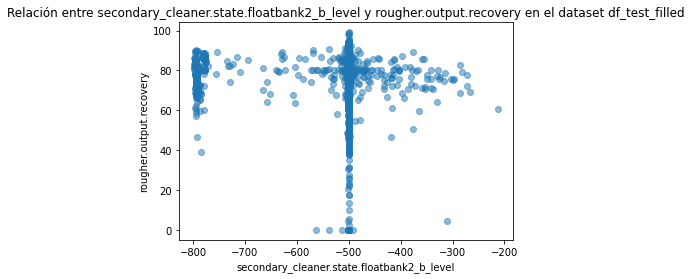


Correlación de Pearson para 'secondary_cleaner.state.floatbank2_b_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


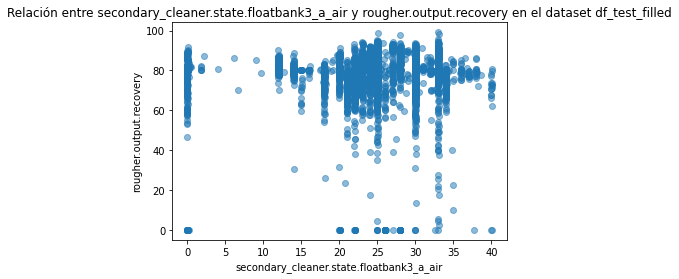


Correlación de Pearson para 'secondary_cleaner.state.floatbank3_a_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


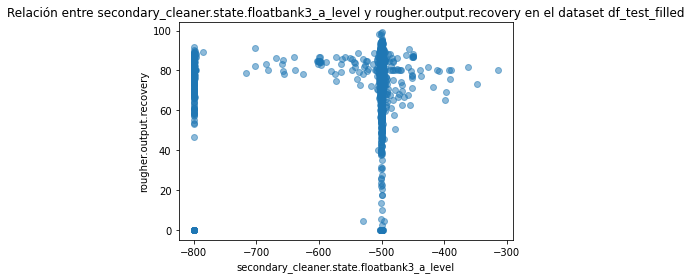


Correlación de Pearson para 'secondary_cleaner.state.floatbank3_a_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


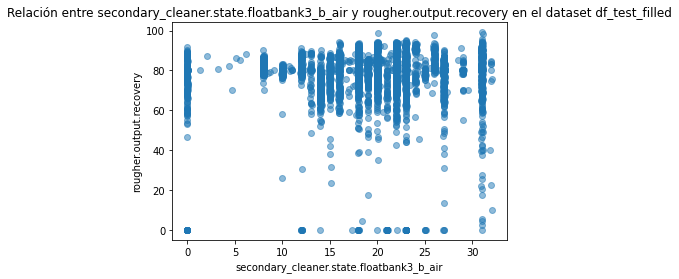


Correlación de Pearson para 'secondary_cleaner.state.floatbank3_b_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


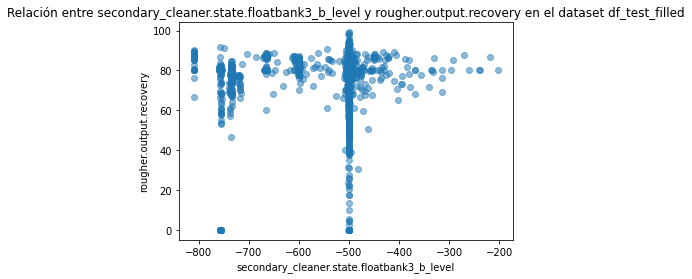


Correlación de Pearson para 'secondary_cleaner.state.floatbank3_b_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


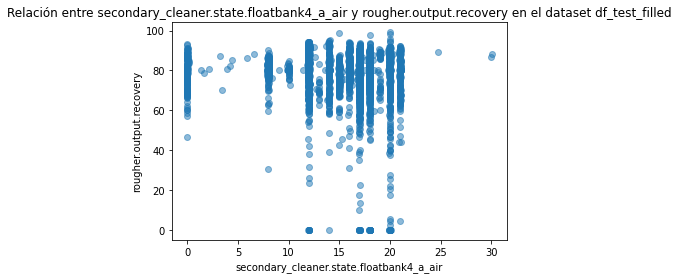


Correlación de Pearson para 'secondary_cleaner.state.floatbank4_a_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


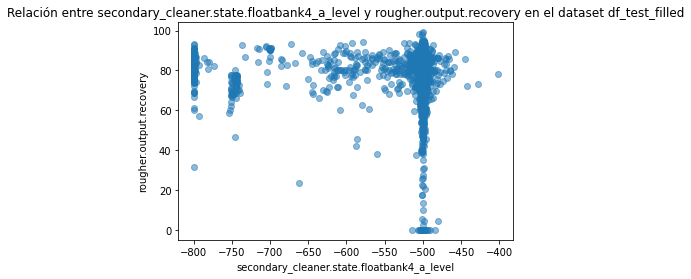


Correlación de Pearson para 'secondary_cleaner.state.floatbank4_a_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


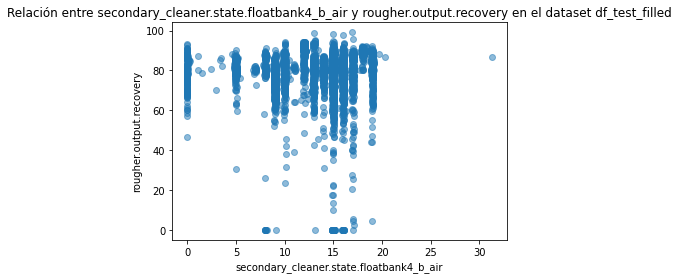


Correlación de Pearson para 'secondary_cleaner.state.floatbank4_b_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


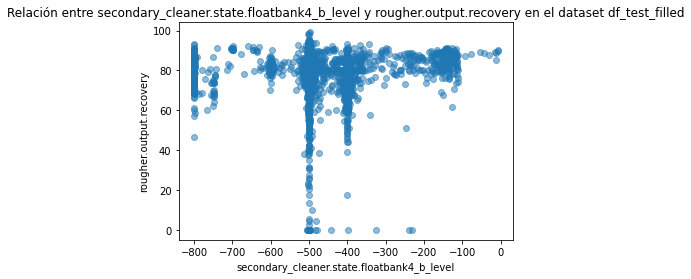


Correlación de Pearson para 'secondary_cleaner.state.floatbank4_b_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


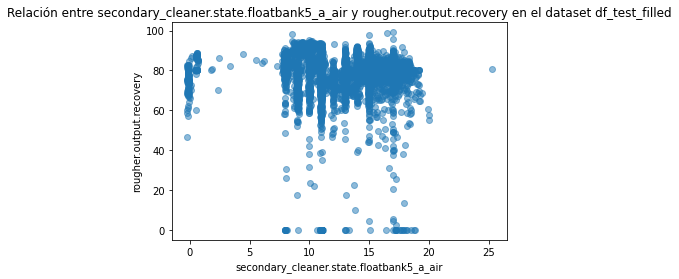


Correlación de Pearson para 'secondary_cleaner.state.floatbank5_a_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


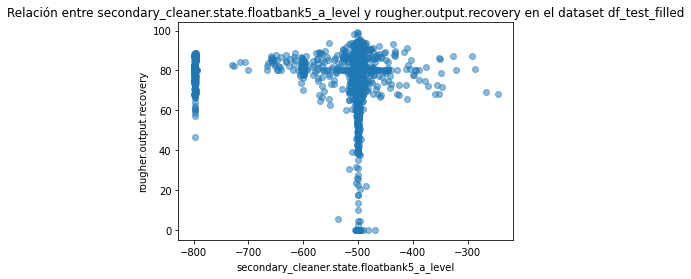


Correlación de Pearson para 'secondary_cleaner.state.floatbank5_a_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


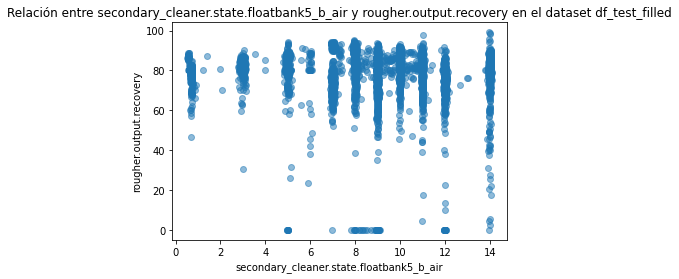


Correlación de Pearson para 'secondary_cleaner.state.floatbank5_b_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


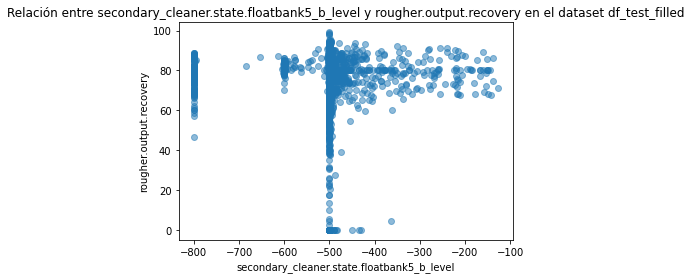


Correlación de Pearson para 'secondary_cleaner.state.floatbank5_b_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


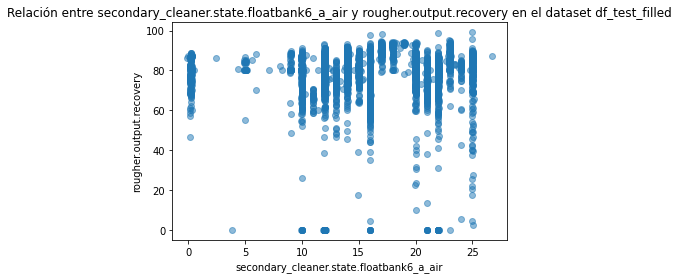


Correlación de Pearson para 'secondary_cleaner.state.floatbank6_a_air' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


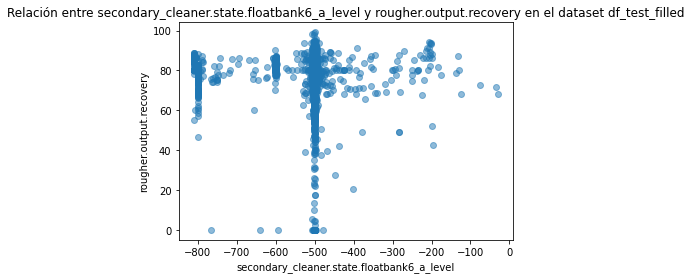


Correlación de Pearson para 'secondary_cleaner.state.floatbank6_a_level' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


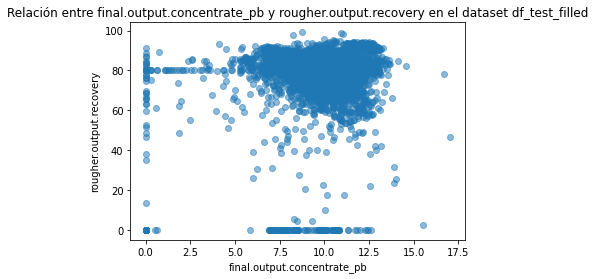


Correlación de Pearson para 'final.output.concentrate_pb' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


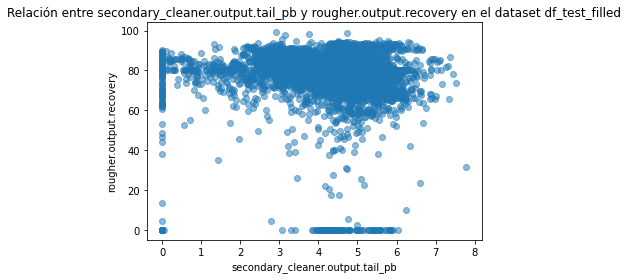


Correlación de Pearson para 'secondary_cleaner.output.tail_pb' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


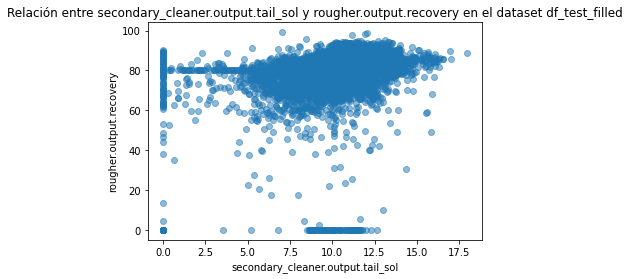


Correlación de Pearson para 'secondary_cleaner.output.tail_sol' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


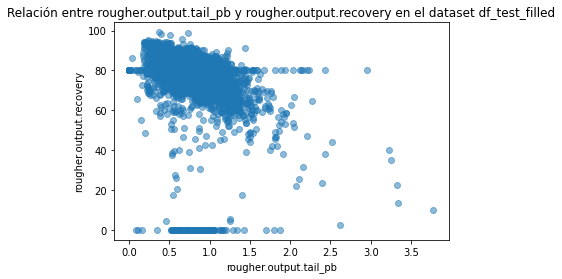


Correlación de Pearson para 'rougher.output.tail_pb' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


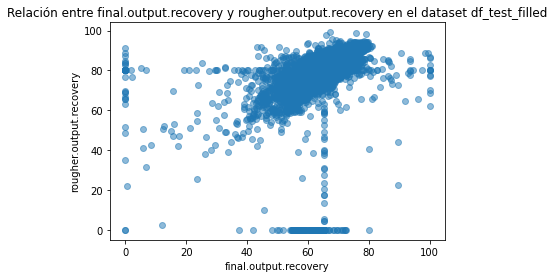


Correlación de Pearson para 'final.output.recovery' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


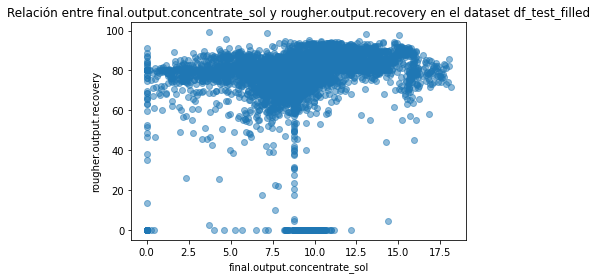


Correlación de Pearson para 'final.output.concentrate_sol' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


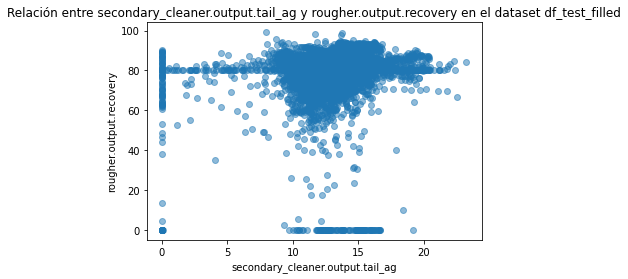


Correlación de Pearson para 'secondary_cleaner.output.tail_ag' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


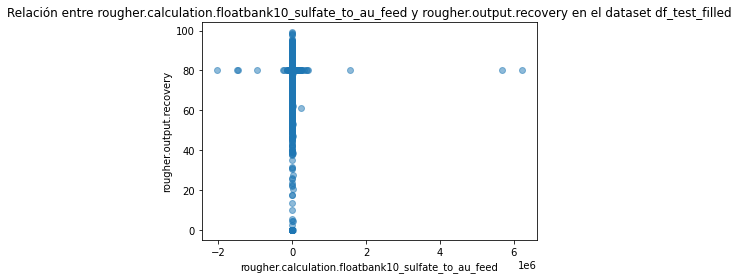


Correlación de Pearson para 'rougher.calculation.floatbank10_sulfate_to_au_feed' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


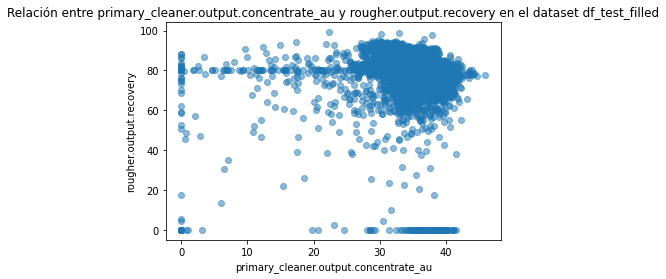


Correlación de Pearson para 'primary_cleaner.output.concentrate_au' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


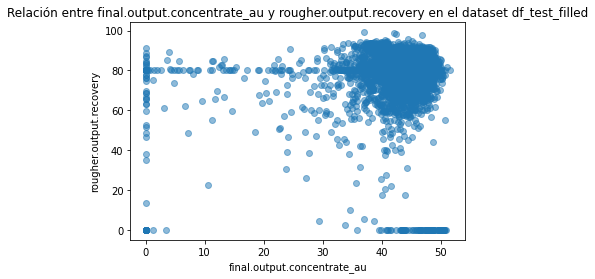


Correlación de Pearson para 'final.output.concentrate_au' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


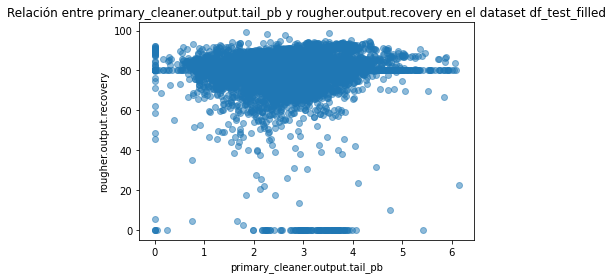


Correlación de Pearson para 'primary_cleaner.output.tail_pb' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


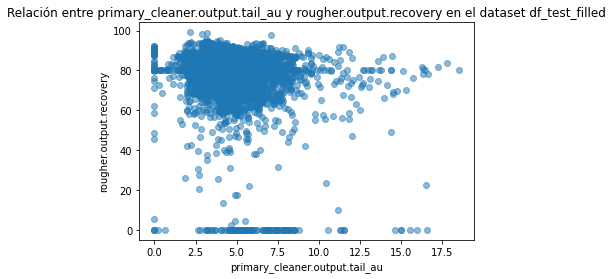


Correlación de Pearson para 'primary_cleaner.output.tail_au' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


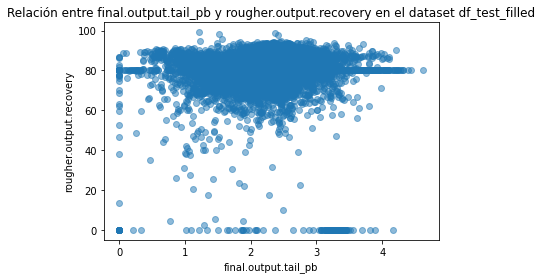


Correlación de Pearson para 'final.output.tail_pb' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


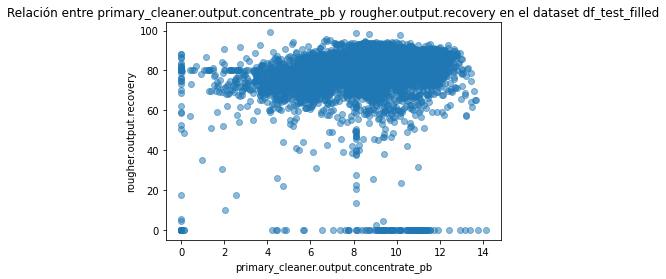


Correlación de Pearson para 'primary_cleaner.output.concentrate_pb' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


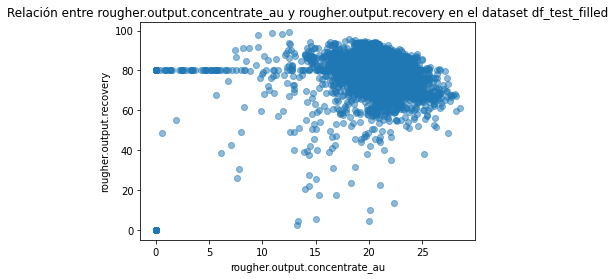


Correlación de Pearson para 'rougher.output.concentrate_au' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


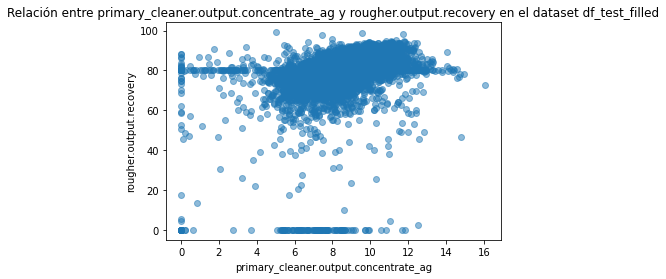


Correlación de Pearson para 'primary_cleaner.output.concentrate_ag' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


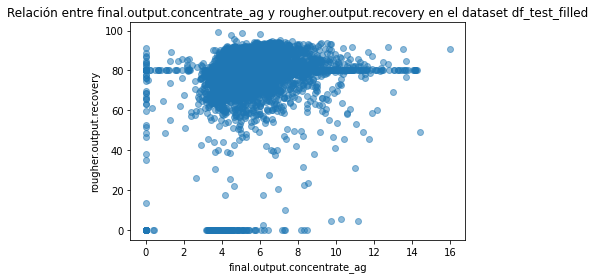


Correlación de Pearson para 'final.output.concentrate_ag' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


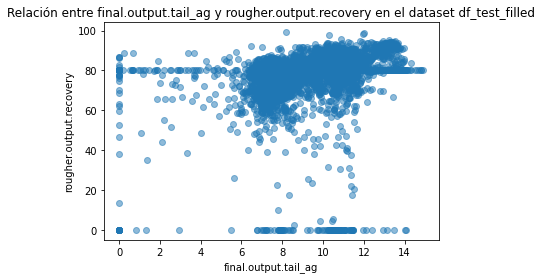


Correlación de Pearson para 'final.output.tail_ag' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


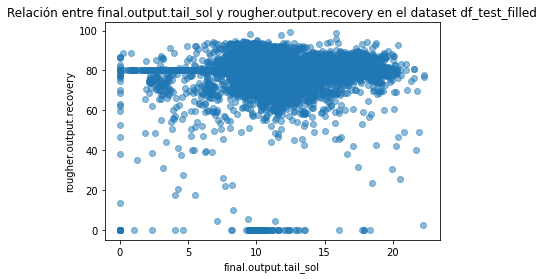


Correlación de Pearson para 'final.output.tail_sol' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


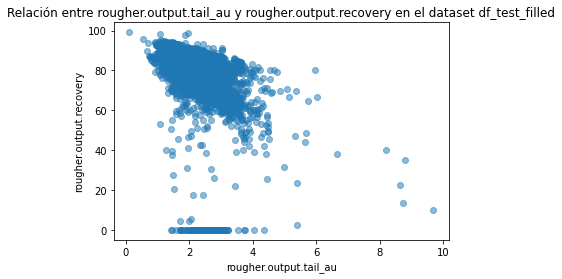


Correlación de Pearson para 'rougher.output.tail_au' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


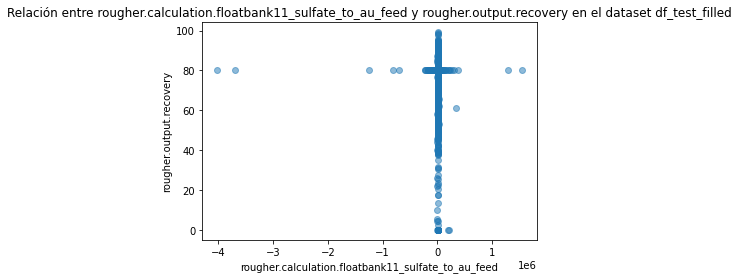


Correlación de Pearson para 'rougher.calculation.floatbank11_sulfate_to_au_feed' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


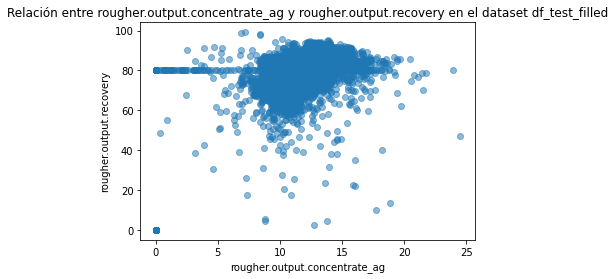


Correlación de Pearson para 'rougher.output.concentrate_ag' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


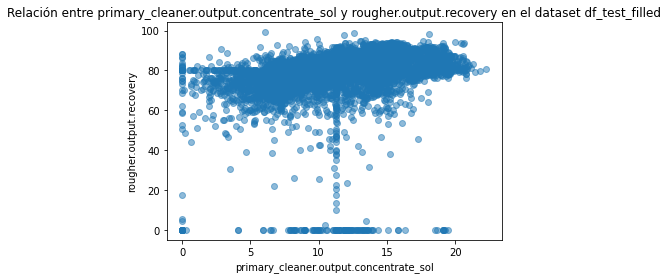


Correlación de Pearson para 'primary_cleaner.output.concentrate_sol' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


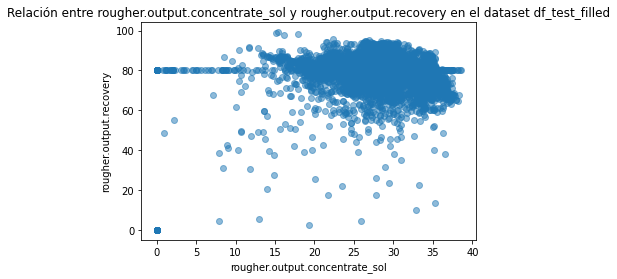


Correlación de Pearson para 'rougher.output.concentrate_sol' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


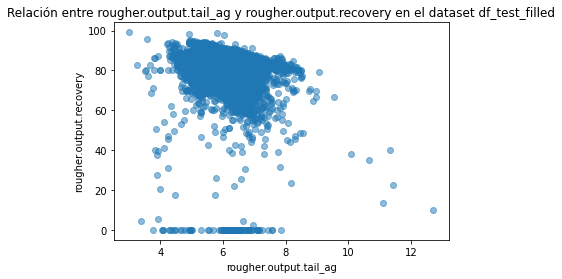


Correlación de Pearson para 'rougher.output.tail_ag' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


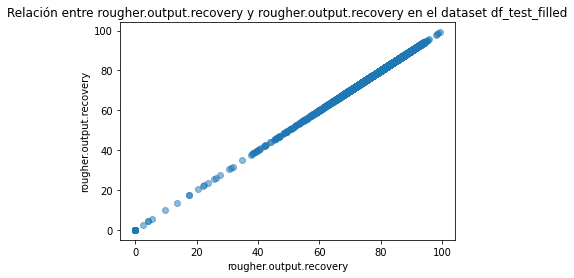


Correlación de Pearson para 'rougher.output.recovery' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


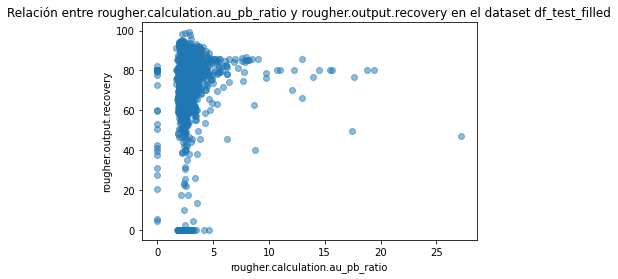


Correlación de Pearson para 'rougher.calculation.au_pb_ratio' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


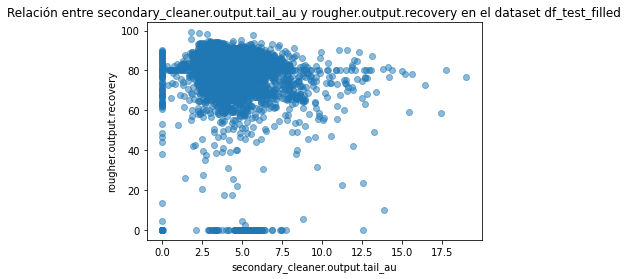


Correlación de Pearson para 'secondary_cleaner.output.tail_au' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


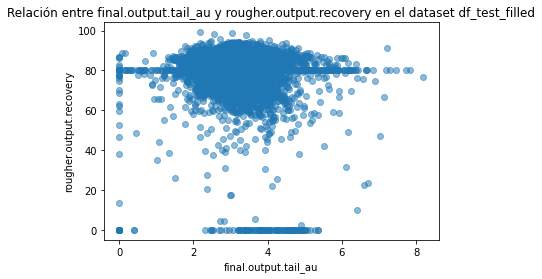


Correlación de Pearson para 'final.output.tail_au' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


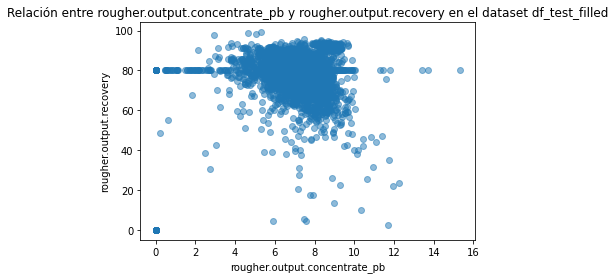


Correlación de Pearson para 'rougher.output.concentrate_pb' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


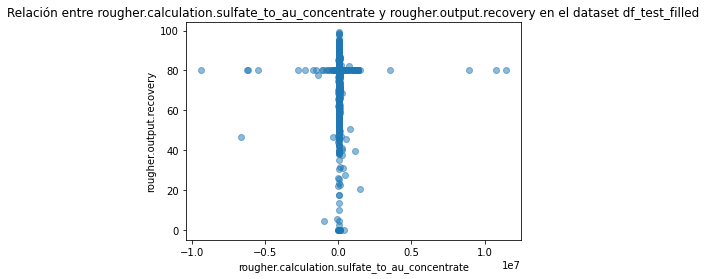


Correlación de Pearson para 'rougher.calculation.sulfate_to_au_concentrate' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


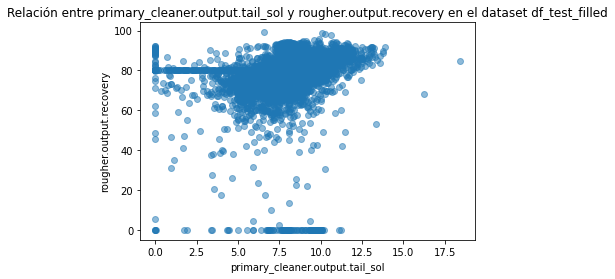


Correlación de Pearson para 'primary_cleaner.output.tail_sol' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


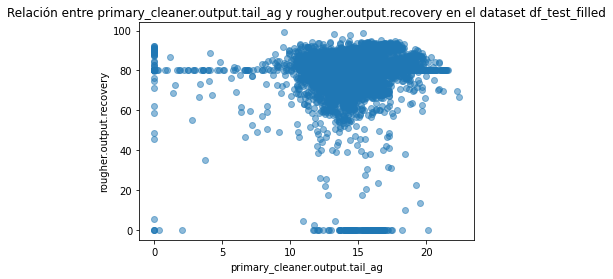


Correlación de Pearson para 'primary_cleaner.output.tail_ag' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


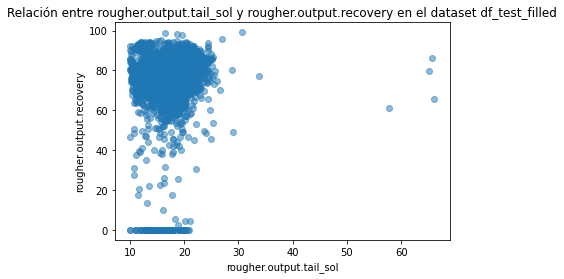


Correlación de Pearson para 'rougher.output.tail_sol' en df_test_filled:
rougher.output.recovery              1.000000
final.output.recovery                0.366524
rougher.output.concentrate_ag        0.354753
rougher.output.concentrate_au        0.269133
rougher.output.concentrate_sol       0.258399
                                       ...   
rougher.state.floatbank10_a_level   -0.119253
primary_cleaner.output.tail_au      -0.181744
rougher.output.tail_ag              -0.196323
rougher.output.tail_pb              -0.337770
rougher.output.tail_au              -0.398517
Name: rougher.output.recovery, Length: 86, dtype: float64


In [14]:
# Crear el gráfico y calcular la correlación para df_test_filled
for feature in df_test_filled.columns[1:]:  # Empezamos desde 1 para omitir la columna 'date'
    visualize_relationship(feature, 'rougher.output.recovery', df_test_filled, "df_test_filled")
    correlation = calculate_pearson_correlation(df_test_filled, 'rougher.output.recovery')
    print(f"\nCorrelación de Pearson para '{feature}' en df_test_filled:")
    print(correlation)

In [15]:
def handle_outliers(df):
    for column in df.columns:
        if column != 'date':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
            
            # Rellenar los valores atípicos con la mediana
            median = df[column].median()
            df.loc[outliers_mask, column] = median
            
    return df

# Aplicar el manejo de valores atípicos a los tres DataFrames
df_training = handle_outliers(df_training)
df_test_filled = handle_outliers(df_test_filled)
df_full = handle_outliers(df_full)

In [16]:
# Verificar duplicados en df_training
duplicates_training = df_training.duplicated().sum()
print("Número de filas duplicadas en df_training:", duplicates_training)

# Verificar duplicados en df_test_filled
duplicates_test = df_test_filled.duplicated().sum()
print("Número de filas duplicadas en df_test_filled:", duplicates_test)

Número de filas duplicadas en df_training: 0
Número de filas duplicadas en df_test_filled: 0


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Revisamos si habia datos atipicos y al observar que hay muchos valores anormales en la distribucion total tomamos la decision de abordar el tema utilizando el rango intercuartilico ya que probamos dejando estos valores y la precision del modelo mermo de manera significativa, lo que nos lleva a la obligacion de tener que lidiar con estos valores atipicos para poder tener mayor precision en el modelo y al abordar el tema, esto nos permitio manejar la la falta de precision adecuadamente, tambien revisamos si habia datos duplicados y no los hay, asi que podemos seguir adelante.
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Buen trabajo con la identificación de outliers. Los gráficos son claros y noto como intentaste mejorarlos con un factor alhpa. Te aconsejo utilizar hex bining para tener más claridad de los patrones, sin embargo, estos solo vienen la librería seaborn. 
</div>

# Construye el Modelo

## Calculo de Recuperacion del Mineral

In [17]:
def recovery_calculation(row):
    numerator = row['rougher.output.concentrate_au'] * (row['rougher.input.feed_au'] - row['rougher.output.tail_au'])
    denominator = row['rougher.input.feed_au'] * (row['rougher.output.concentrate_au'] - row['rougher.output.tail_au'])
    
    # Manejo de casos donde el denominador es cero
    if denominator == 0:
        recovery = 0
    else:
        recovery = numerator / denominator * 100
    
    # Manejo de casos donde la recuperación calculada es extremadamente alta
    max_recovery = 1000  # Define un límite superior razonable para la recuperación
    if recovery > max_recovery:
        recovery = max_recovery
    
    return recovery

In [18]:
# Calcular la recuperación para cada fila del conjunto de entrenamiento

df_training['recovery_calculated'] = df_training.apply(recovery_calculation, axis=1)

In [19]:
# Calcular el Error Absoluto Medio (MAE) entre las recuperaciones calculadas y las recuperaciones reales
mae = (df_training['recovery_calculated'] - df_training['rougher.output.recovery']).abs().mean()
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 1.7633069734303917


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca hemos Creado la funcion que calculara cuanto mineral se podra recuperar y la ponemos a prueba, como se puede observar el resultado es muy pequeño, lo que nos deja en evidencia la efectividad y confiabilidad del procedimiento de calculo que usamos, aparte de que la calidad de los datos tambien queda en evidencia, significa que tenemos unos calculos bastante exactos como para confiar en ellos ya que el resultado se acerca bastante a cero.
</div>

## Creacion de la Funcion sMAPE

In [20]:
# características (features) del conjunto de prueba

features = df_test_filled.columns.values
features

array(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.state.floatbank10_a_air',
       'rougher.state.floatban

In [21]:
# Definir las etiquetas (targets) que se utilizarán para el entrenamiento del modelo, que son las recuperaciones de la etapa de flotación inicial y final

targets = ['rougher.output.recovery', 'final.output.recovery']

In [22]:
# Preparar los datos de entrenamiento dividiendo las características (features) y las etiquetas (targets), y renombrar las columnas de las etiquetas

X_train = df_training[features].reset_index(drop = True)
y_train = df_training[targets].reset_index(drop = True)

y_train.columns = [0,1]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Se dividieorn las conjuntos de entrenamiento y prueba de forma adecuada. 
</div>

In [23]:
# Mostrar las etiquetas (targets) preparadas para el entrenamiento del modelo

y_train

0          1
0      87.107763  70.541216
1      86.843261  69.266198
2      86.842308  68.116445
3      87.226430  68.347543
4      86.688794  66.927016
...          ...        ...
16855  89.574376  73.755150
16856  87.724007  69.049291
16857  88.890579  67.002189
16858  89.858126  65.523246
16859  89.514960  70.281454

[16860 rows x 2 columns]

In [24]:
# Eliminar la columna 'date' de las características (features) del conjunto de entrenamiento

X_train = X_train.drop(['date'], axis = 1)

In [25]:
# Definir funciones para calcular el sMAPE y un sMAPE ponderado para su uso como métrica de evaluación del modelo

def compute_smape(y, y_pred):
    n = len(y)
    real = abs(y)
    pred = abs(y_pred)
    diff = abs(y - y_pred)
    smape =  (1/n)*np.sum(diff /((real + pred)/2))*100
    return smape

def smape_ponderado(y, y_pred):
    
    y_rougher = y.iloc[:,0]
    y_pred_rougher = y_pred[:,0]
    
    y_final = y.iloc[:,1]
    y_pred_final = y_pred[:,1]
    
    smape_rougher = compute_smape(y_rougher, y_pred_rougher)
    smape_final = compute_smape(y_final, y_pred_final)
    
    return (0.25*smape_rougher + 0.75*smape_final)

In [26]:
# Crear un objeto 'smape_scorer' para utilizar la métrica sMAPE como puntuación de validación cruzada

smape_scorer = make_scorer(smape_ponderado)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Correcto!. Se implentó la funcio4n personalizada de scorer. 
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Creamos la funcion `compute_smape`y `smape_ponderado` con las cuales se estara enfrentando el modelo para ser evaluado previo su entrenamiento.
</div>

## Entrenamiento y Escogencia del Modelo

In [31]:
# Entrenar un modelo Random Forest utilizando las características (features) y las etiquetas (targets) del conjunto de entrenamiento
# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(X_train, y_train)

# Realizar la validación cruzada del modelo Random Forest utilizando la métrica sMAPE ponderada
# rf_scores = cross_val_score(rf_model, X_train, y_train, scoring=smape_scorer, cv=5)

# Calcular y mostrar el puntaje sMAPE promedio y los puntajes sMAPE para cada iteración de la validación cruzada del modelo Random Forest
# rf_final_score = rf_scores.mean()

# print('Puntajes sMAPE para cada iteración:', rf_scores)
# print('Modelo Random Forest | sMAPE = {:.20f}'.format(rf_final_score))

Puntajes sMAPE para cada iteración: [0.16748125 0.16835748 0.14708783 0.1234615  0.16430958]
Modelo Random Forest | sMAPE = 0.15413952831308916358


In [32]:
# 1. Entrenar un modelo de regresión Lasso utilizando las características (features) y las etiquetas (targets) del conjunto de entrenamiento
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)

# 2. Realizar la validación cruzada del modelo de regresión Lasso utilizando la métrica sMAPE ponderada
lasso_scores = cross_val_score(lasso_model, X_train, y_train, scoring=smape_scorer, cv=5)

# 3. Calcular y mostrar el puntaje sMAPE promedio y los puntajes sMAPE para cada iteración de la validación cruzada del modelo de regresión Lasso
lasso_final_score = lasso_scores.mean()

print('Puntajes sMAPE para cada iteración:', lasso_scores)
print('Modelo de Regresión Lasso | sMAPE = {:.20f}'.format(lasso_final_score))

Puntajes sMAPE para cada iteración: [0.19508333 0.18750674 0.20008568 0.15526022 0.18107287]
Modelo de Regresión Lasso | sMAPE = 0.18380176678518519995


In [33]:
# 1. Entrenar un modelo de regresión Ridge utilizando las características (features) y las etiquetas (targets) del conjunto de entrenamiento
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)

# 2. Realizar la validación cruzada del modelo de regresión Ridge utilizando la métrica sMAPE ponderada
ridge_scores = cross_val_score(ridge_model, X_train, y_train, scoring=smape_scorer, cv=5)

# 3. Calcular y mostrar el puntaje sMAPE promedio y los puntajes sMAPE para cada iteración de la validación cruzada del modelo de regresión Ridge
ridge_final_score = ridge_scores.mean()

print('Puntajes sMAPE para cada iteración:', ridge_scores)
print('Modelo de Regresión Ridge | sMAPE = {:.20f}'.format(ridge_final_score))

Puntajes sMAPE para cada iteración: [2.43718426e-05 2.47072055e-05 2.44299586e-05 1.93015617e-05
 2.49802885e-05]
Modelo de Regresión Ridge | sMAPE = 0.00002355817137667872


In [34]:
# 1. Entrenar un modelo de regresión lineal utilizando las características (features) y las etiquetas (targets) del conjunto de entrenamiento
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. Realizar la validación cruzada del modelo de regresión lineal utilizando la métrica sMAPE ponderada
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring=smape_scorer, cv=5)

# 3. Calcular y mostrar el puntaje sMAPE promedio y los puntajes sMAPE para cada iteración de la validación cruzada del modelo de regresión lineal
lr_final_score = lr_scores.mean()

print('Puntajes sMAPE para cada iteración:', lr_scores)
print('Modelo de Regresión Lineal | sMAPE = {:.20f}'.format(lr_final_score))

Puntajes sMAPE para cada iteración: [7.94376423e-14 4.18152756e-13 5.95343005e-13 3.06032751e-13
 1.80214802e-13]
Modelo de Regresión Lineal | sMAPE = 0.00000000000031583619


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca enfrentamos los modelos a las funciones creadas con anterioridad para evaluar su efectividad, tenemos unos hallazgos de lo mas interesantes, podemos ver que el modelo `Random Forest` practicamente es prohibitivo por el tiempo que toma para arrojar un resultado, aparte de que su precision no es la mejor, asi que por ello esta descartado, luego vemos los resultados del modelo `Regression Lasso`, este modelo tarda menos en ofrecernos un resultado, pero su precision es aun peor que el `Random Forest`, asi que aunque sea mas rapido en responder, esta descartado por su falta de precision, en comparacion con el anterior, despues vemos el modelo `Regression Ridge`, este es superior a los anteriores en ambas cosas, velocidad de entrega y precision, lo cual lo pone como candidato interesante en la evaluacion, por ultimo vemos el modelo `Linear Regression`, aun mejor que los 3 anteriores, es un modelo que nos provee el resultado en poco tiempo y tiene una precision sumamente alta, lo cual nos decanta por este al buscar un modelo que cumpla con ser preciso en sus calculos y que no sea lento, asi que nos quedaremos con este como mejor modelo de la evaluacion, lo cual nos lleva a pasar a la parte de conclusiones.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
¡Muy bien! 👏👏 Los cálculos de esta sección están correctos y eso es un gran logro. Sigue así y verás cómo poco a poco te irás convirtiendo en un experto en esta área. 💪💻</div>

# Conclusiones

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como pudimos observar, tuvimos varios retos para poder completar de manera satisfactoria la tarea requerida, podriamos empezar mencionando el hecho de que la data en el `df_test` estaba incompleta con columnas faltantes, aparte de que en el `df_training tambien habia valores faltantes`, al abordar estos inconvenientes primero para el `df_training` usando el metodo `ffill` pudimos solventar parte del inconveniente en la data, no obstante para solventar el problema que tenia la data en el `df_test`, tuve que hacer algo mas que usar el metodo `ffill`, usamos el `df_full` como guia, primero para completar las columnas faltantes en el `df_test` y luego creamos un nuevo `DF` el cual llamamos `df_test_filled` en el cual aplicamos la `mediana`, para completar la data faltante en cada una de estas columnas, porque la mediana?, pues simple, porque es un metodo el cual nos permite incidir lo menos posible en el resultado final de la evaluacion, ya que deseamos que la evaluacion sea lo mas veras posible, luego de abordar esta complicacion, pasamos a cambiar el tipo de variable de la columna `date` aunque al final no la usamos, pero en caso de que nos fuera de utilidad en la evaluacion, ya esta columna estaria preparada para su uso, revisamos si habia datos duplicados y no los habia, asi que continuamos la travesia en nuestra tarea, ahora para hacer un analisis a profundidad de los datos procedimos a describir ambos `DF` que estariamos usando, para ello usamos el metodo `describe` y viendo que habia ciertas peculiaridades en los resultados, decidi graficar la relacion de las columnas de ambos `DF`, al ver los resultados de los graficos, podemos observar que nuestra data tiene muchos valores anormales en la distribucion total, por lo cual hubo que lidiar con este problema de las anomalias en la data, de que manera?, simple, escogi utilizar una funcion para corregir estos datos utilizando la mediana de ellos, despues de haber sido calculado el rango intercuartilico, para poder someter la correccion, solo a los datos que la necesitaban, luego para estar seguros de que la data estaba corregida correctamente procedimos a crear nuestra funcion `sMAPE`, la cual nos ayudaria a simplificar el proceso de entrenamiento y evaluacion de los diferentes modelos que probamos y asi dar con cual seria el mas indicado para usar en este caso en especifico, luego de esto entonces pasamos a la parte de entrenamiento y evaluacion de los diferentes modelos, dada la lentitud del modelo `Random Forest Regression`, dejamos bloqueado como comentario y dejamos el resultado que nos arrojo por aca: `Puntajes sMAPE para cada iteración: [0.16748125 0.16835748 0.14708783 0.1234615  0.16430958]
Modelo Random Forest | sMAPE = 0.15413952831308916358`, como de todos modos aparte de ser lento es uno de los menos precisos, no fue escogido como mejor modelo en la evaluacion, al final de nuestra evaluacion, pudimos observar que el modelo `Linear Regression` si cumplia con las caracteristicas que estabamos buscando en esta evaluacion, precision y rapidez en la entrega de resultados, asi que como tenemos un modelo que cumple, podemos decir que los resultados fueron mas que satisfactorios.
</div>

<div class="alert alert-block alert-success">    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Qué gran trabajo has hecho!  &#128077;  Podemos aprobar el proyecto. <br>
Has demostrado un excelente conocimiento en la construcción de modelos, al eliminar variables innecesarias y procesar  los datos antes de entrenar los modelos. <br>
<br>Quiero felicitarte por un trabajo excepcional y por la calidad de tu análisis. Te animo a que sigas aprendiendo y desafiando tu potencial en los próximos sprints. Estoy seguro de que tus habilidades y conocimientos serán valiosos en el futuro y te permitirán abordar problemas cada vez más complejos con éxito.
</div>